In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from qdyn import propagator, animate_dynamics

In [5]:
def V_ground(x):
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te


def V_excited(x):
    de=0.03342
    re=3.03150
    beta=0.19459
    te=0.327
    return de*(1-re/x*np.exp(-beta*(x**2-re**2)))**2+te

In [6]:
def k_grnd():
    de=0.19158
    re=2.29716
    beta=0.21098
    te=0.1
    k_grnd = 2*de*(1/re+2*beta*re)**2
    return k_grnd

In [7]:
def k_exci():
    de=0.03342
    re=3.03150
    beta=0.19459
    te=0.327
    k_exci = 2*de*(1/re+2*beta*re)**2
    return k_exci

In [8]:
from numpy.polynomial.hermite import hermval

def eigen_ho(x,v,m,k):
    """Calculates the eigenfunction of the harmonic oscillator system.
    
    Arguments
    x: is a space coordinate.
    v: is the vibrational quantum number.
    m: is the mas of the system.
    k: is the force constant of the harmonic potential.
    """
    
    hermite_sum=zeros(v+1)
    hermite_sum[-1]=1
    return 1/(2**v * math.factorial(v))**0.5 * (((m*k)**0.5)/pi)**0.25 * np.e**(-x**2 * ((m*k)**0.5)/2) * hermval((m*k)**0.25 * x,hermite_sum) 

In [9]:
import numpy as np
def transition_dipole_moment(x):
    '''Transition dipole moment dependence on the inter-atomic
    coordinate x for the O2 electronic transition.
    The input x, and the output of the function are in atomic units.'''

    #parameters for connecting function
    ss=2
    es=2.28
    plateau=0.266
    peak=0.94

    #step function of order 7 (n=3)
    xs=(x-ss)/(es-ss)
    step= -20*xs**7 + 70*xs**6 - 84*xs**5 + 35*xs**4
    step= plateau + (peak-plateau)*step

    #exponential decay for higher x values
    decay=3.85*np.exp(-0.626*x)

    return np.where(x<ss,plateau,np.where(x>es,decay,step))

# Start the codes

<Figure size 2400x1800 with 0 Axes>

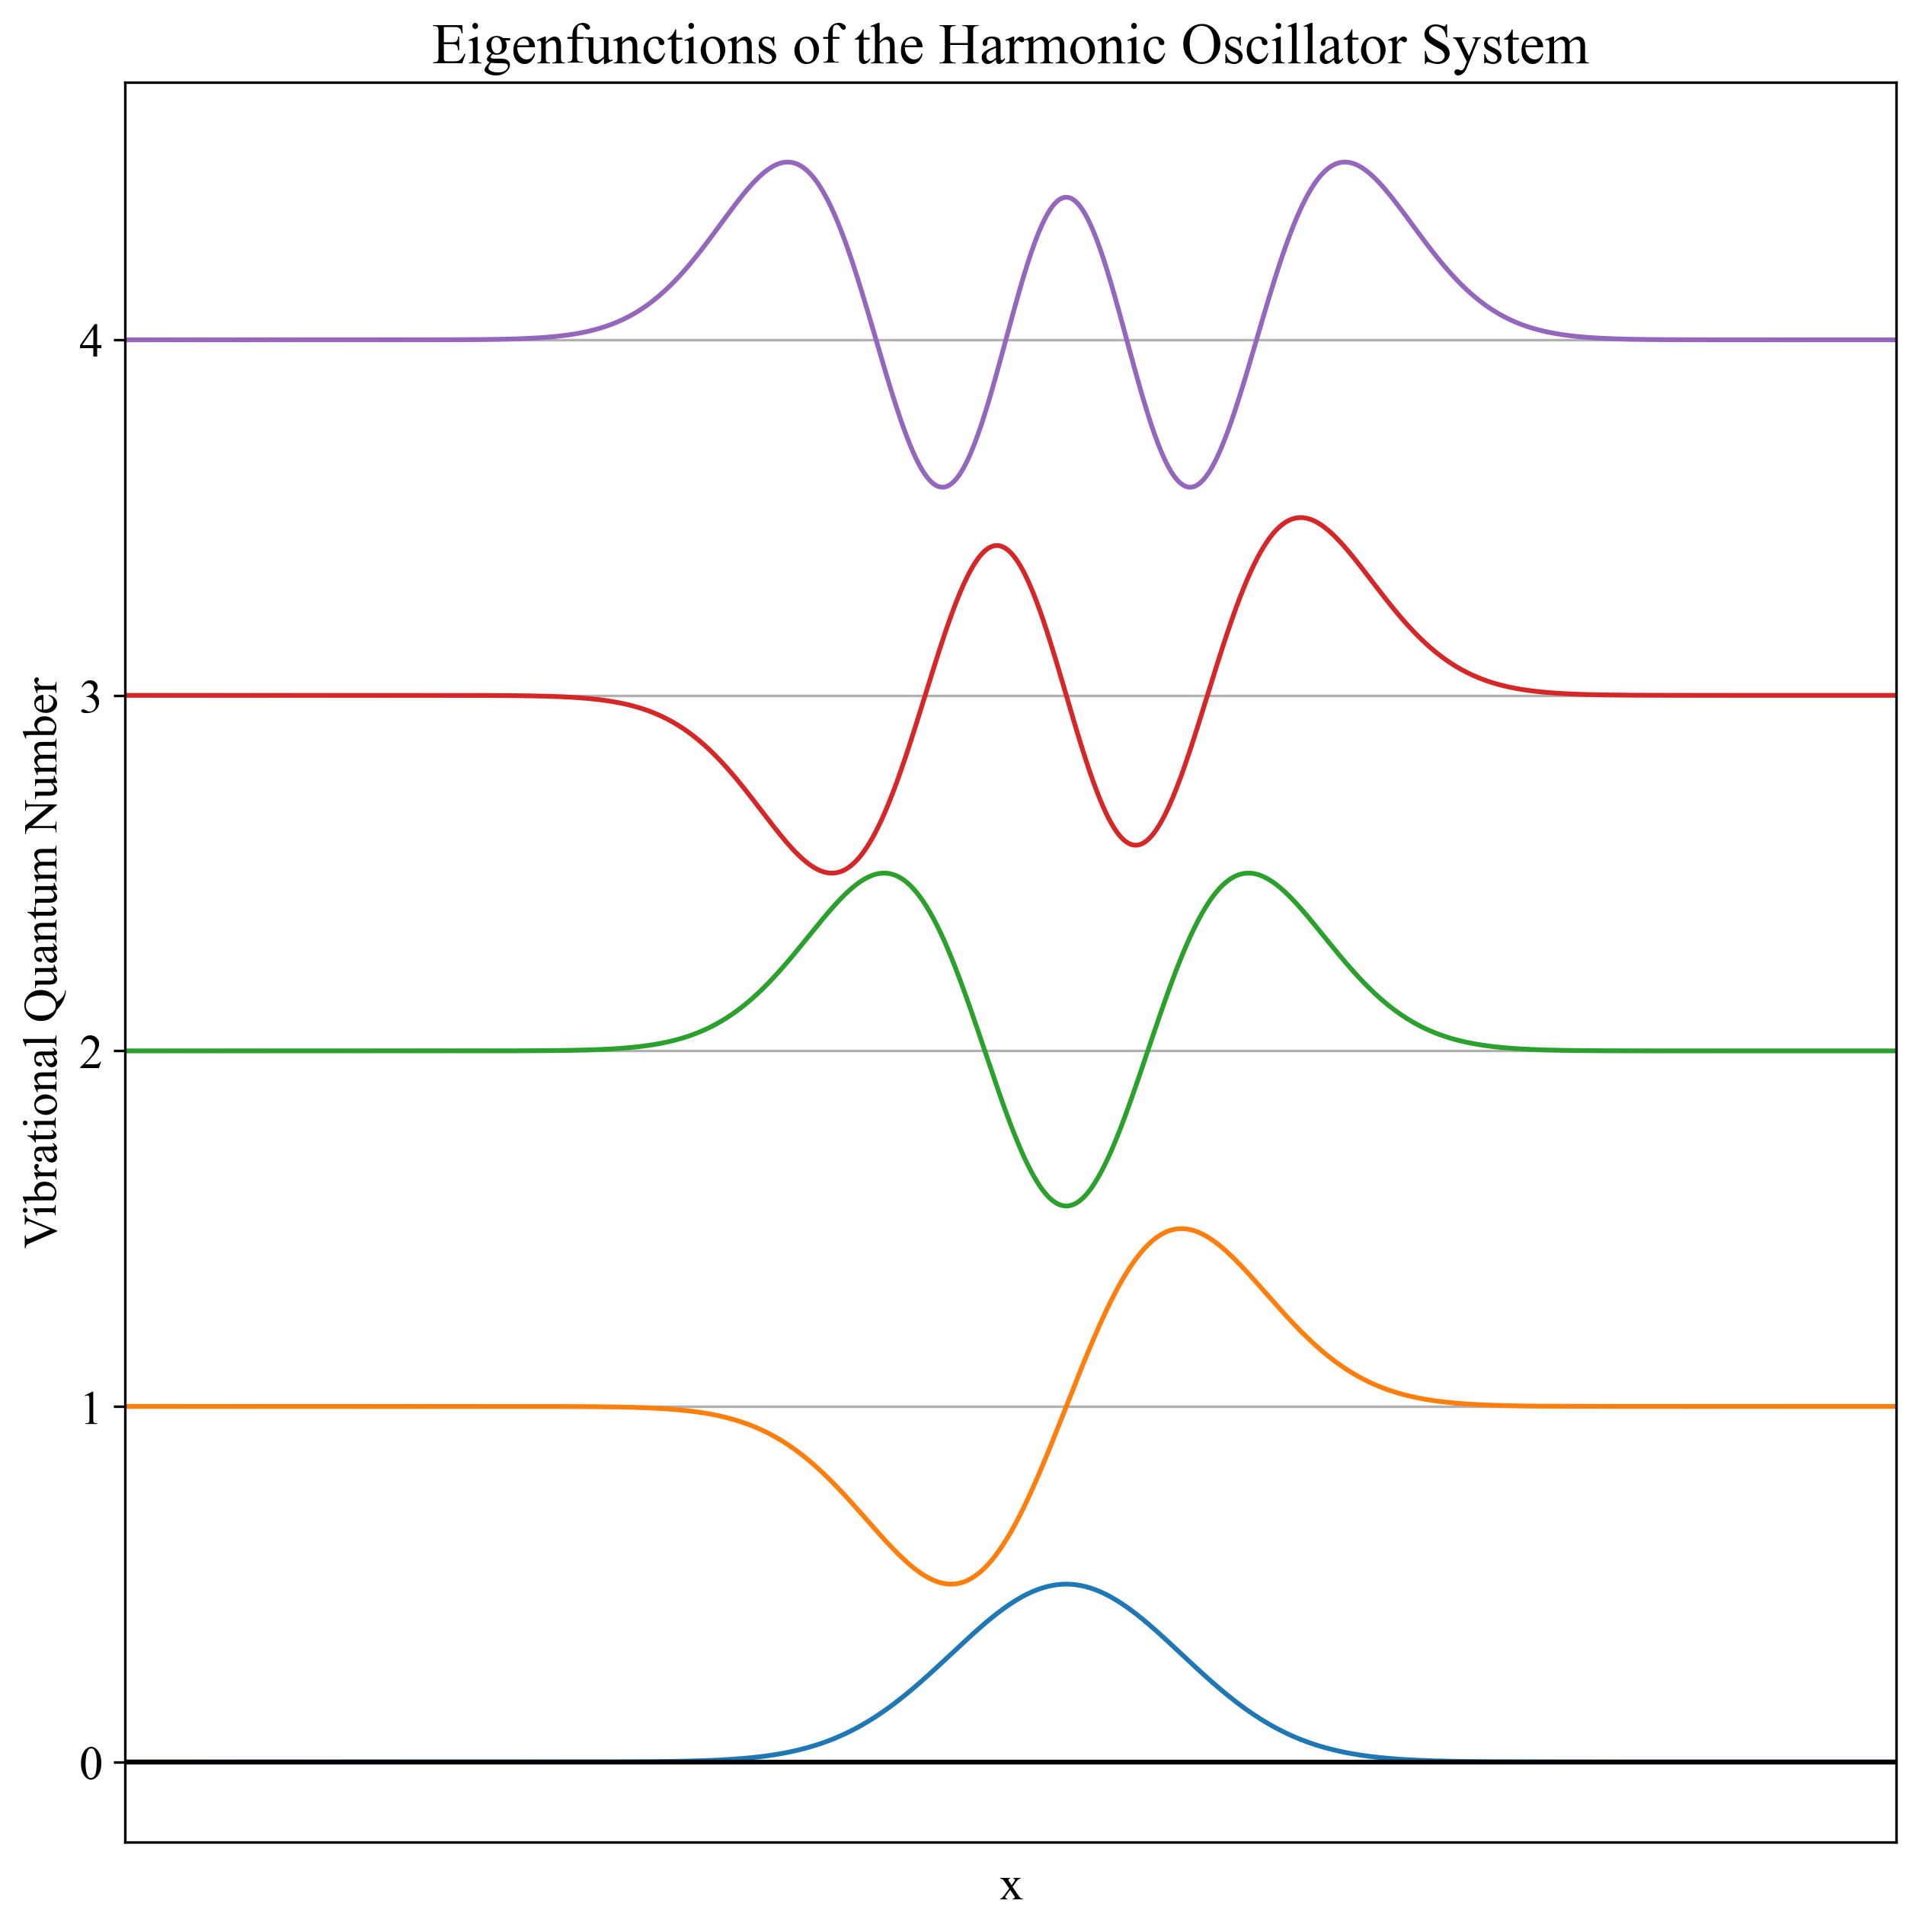

In [21]:
m=14583 #reduced mass of O2 in atomic units




plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(10,10))
x_grid=linspace(1.5,3,1000)
for i in range(5):
    scale_factor=1/max(eigen_ho(x_grid-2.29716,i,m,k_grnd()))*0.5
    plt.plot(x_grid,eigen_ho(x_grid-2.29716,i,m,k_grnd())*scale_factor+1*i,linestyle="-")
plt.yticks(np.arange(0, 5, step=1))

# Add styles for the graph


plt.xticks([])
plt.xlabel("x")
plt.ylabel("Vibrational Quantum Number")
plt.title("Eigenfunctions of the Harmonic Oscillator System")
plt.xlim([1.5,3])

#plt.ylim()

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()


Set the mass and ground with excited wavefunction.

In [9]:
m=14583 #reduced mass of O2 in atomic units
x_grid=np.linspace(1,10,10000)

wf_grd = eigen_ho((x_grid-2.29716),0,m,k_grnd())
miu = transition_dipole_moment(x_grid)

wf_exci = wf_grd*miu

Test the plot if they're correct.

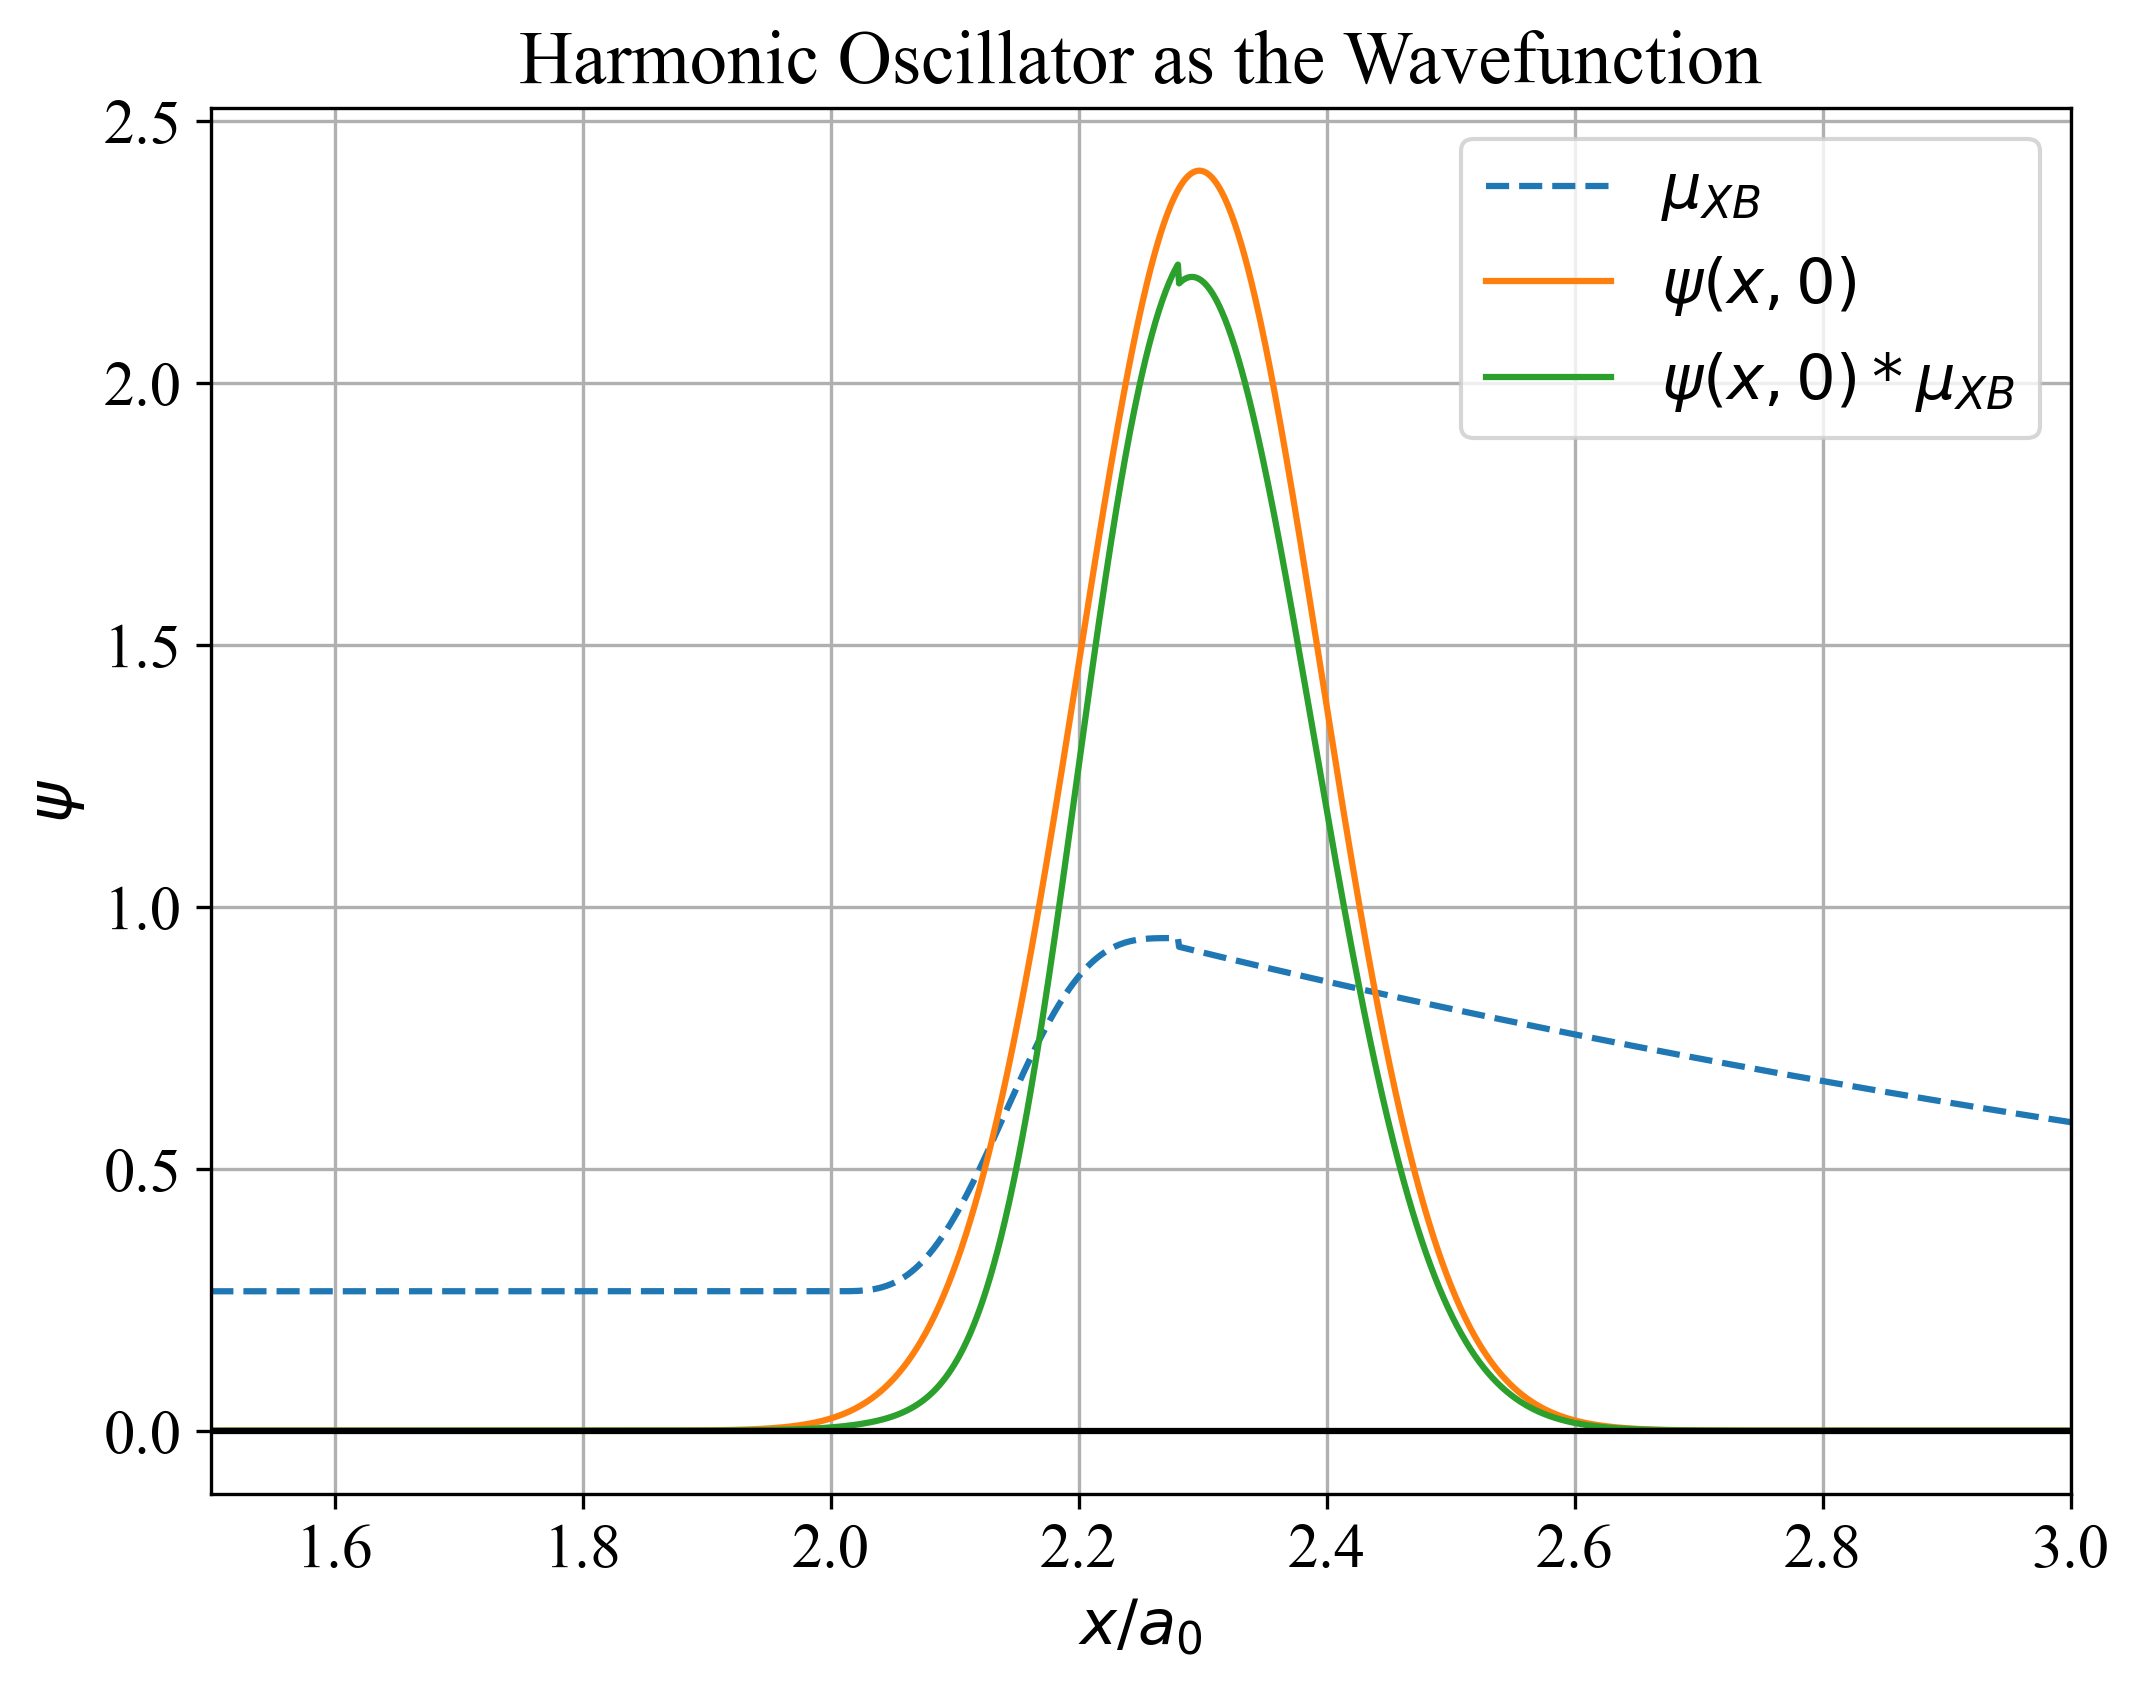

In [119]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plt.plot(x_grid,miu,label='$\mu_{XB}$',linestyle = '--')
plt.plot(x_grid,wf_grd,label='$\psi(x,0)$')
plt.plot(x_grid,wf_exci,label='$\psi(x,0)*\mu_{XB}$')

# Add styles for the graph
plt.title("Harmonic Oscillator as the Wavefunction")

plt.xlabel("$x/a_0$")
plt.ylabel('$\psi$')

plt.xlim([1.5,3])
#plt.ylim()

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend()
plt.show()


Animate the wavefunction on the excited potential.

In [43]:
k_grnd()

0.7559688503076477

In [45]:
dt=0.1
nsteps=15000

wf_dynamics_exi=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics_exi[0]=wf_exci


for step in range(nsteps):
    psi_exi=propagator(x_grid,wf_dynamics_exi[step],m,dt,V_excited)
    wf_dynamics_exi[step+1]=psi_exi
    
wf_dynamics_exi[1:] = wf_dynamics_exi[1:]*miu

#animate_dynamics(x_grid,wf_dynamics_exi,dt,V_excited(x_grid))

In [48]:
t_series = arange(0,nsteps+1)*dt
t_series

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.4998e+03, 1.4999e+03,
       1.5000e+03])

In [185]:
color = iter(cm.nipy_spectral(np.linspace(0, 1, 15)))


for i in range(15):
    c = next(color)
    ans = "plt.plot(x_grid,abs(wf_dynamics_exi["+str(i*1000)+ r"]),label='t = "+str(i*1000*dt) + r" a.u.',c="+str(list(c))+')'
    ans2 = "plt.plot(x_grid,real(wf_dynamics_exi["+str(i*1000)+ r"]),linestyle = '--', c="+str(list(c))+')'

    print(ans)
    print(ans2)

plt.plot(x_grid,abs(wf_dynamics_exi[0]),label='t = 0.0 a.u.',c=[0.0, 0.0, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[0]),linestyle = '--', c=[0.0, 0.0, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[1000]),label='t = 100.0 a.u.',c=[0.4941235294117647, 0.0, 0.5607647058823529, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[1000]),linestyle = '--', c=[0.4941235294117647, 0.0, 0.5607647058823529, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[2000]),label='t = 200.0 a.u.',c=[0.0941117647058824, 0.0, 0.6549294117647059, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[2000]),linestyle = '--', c=[0.0941117647058824, 0.0, 0.6549294117647059, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[3000]),label='t = 300.0 a.u.',c=[0.0, 0.10981176470588236, 0.8667, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[3000]),linestyle = '--', c=[0.0, 0.10981176470588236, 0.8667, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[4000]),label='t = 400.0 a.u.',c=[0.0, 0.5634078431372549, 0.8667, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[4

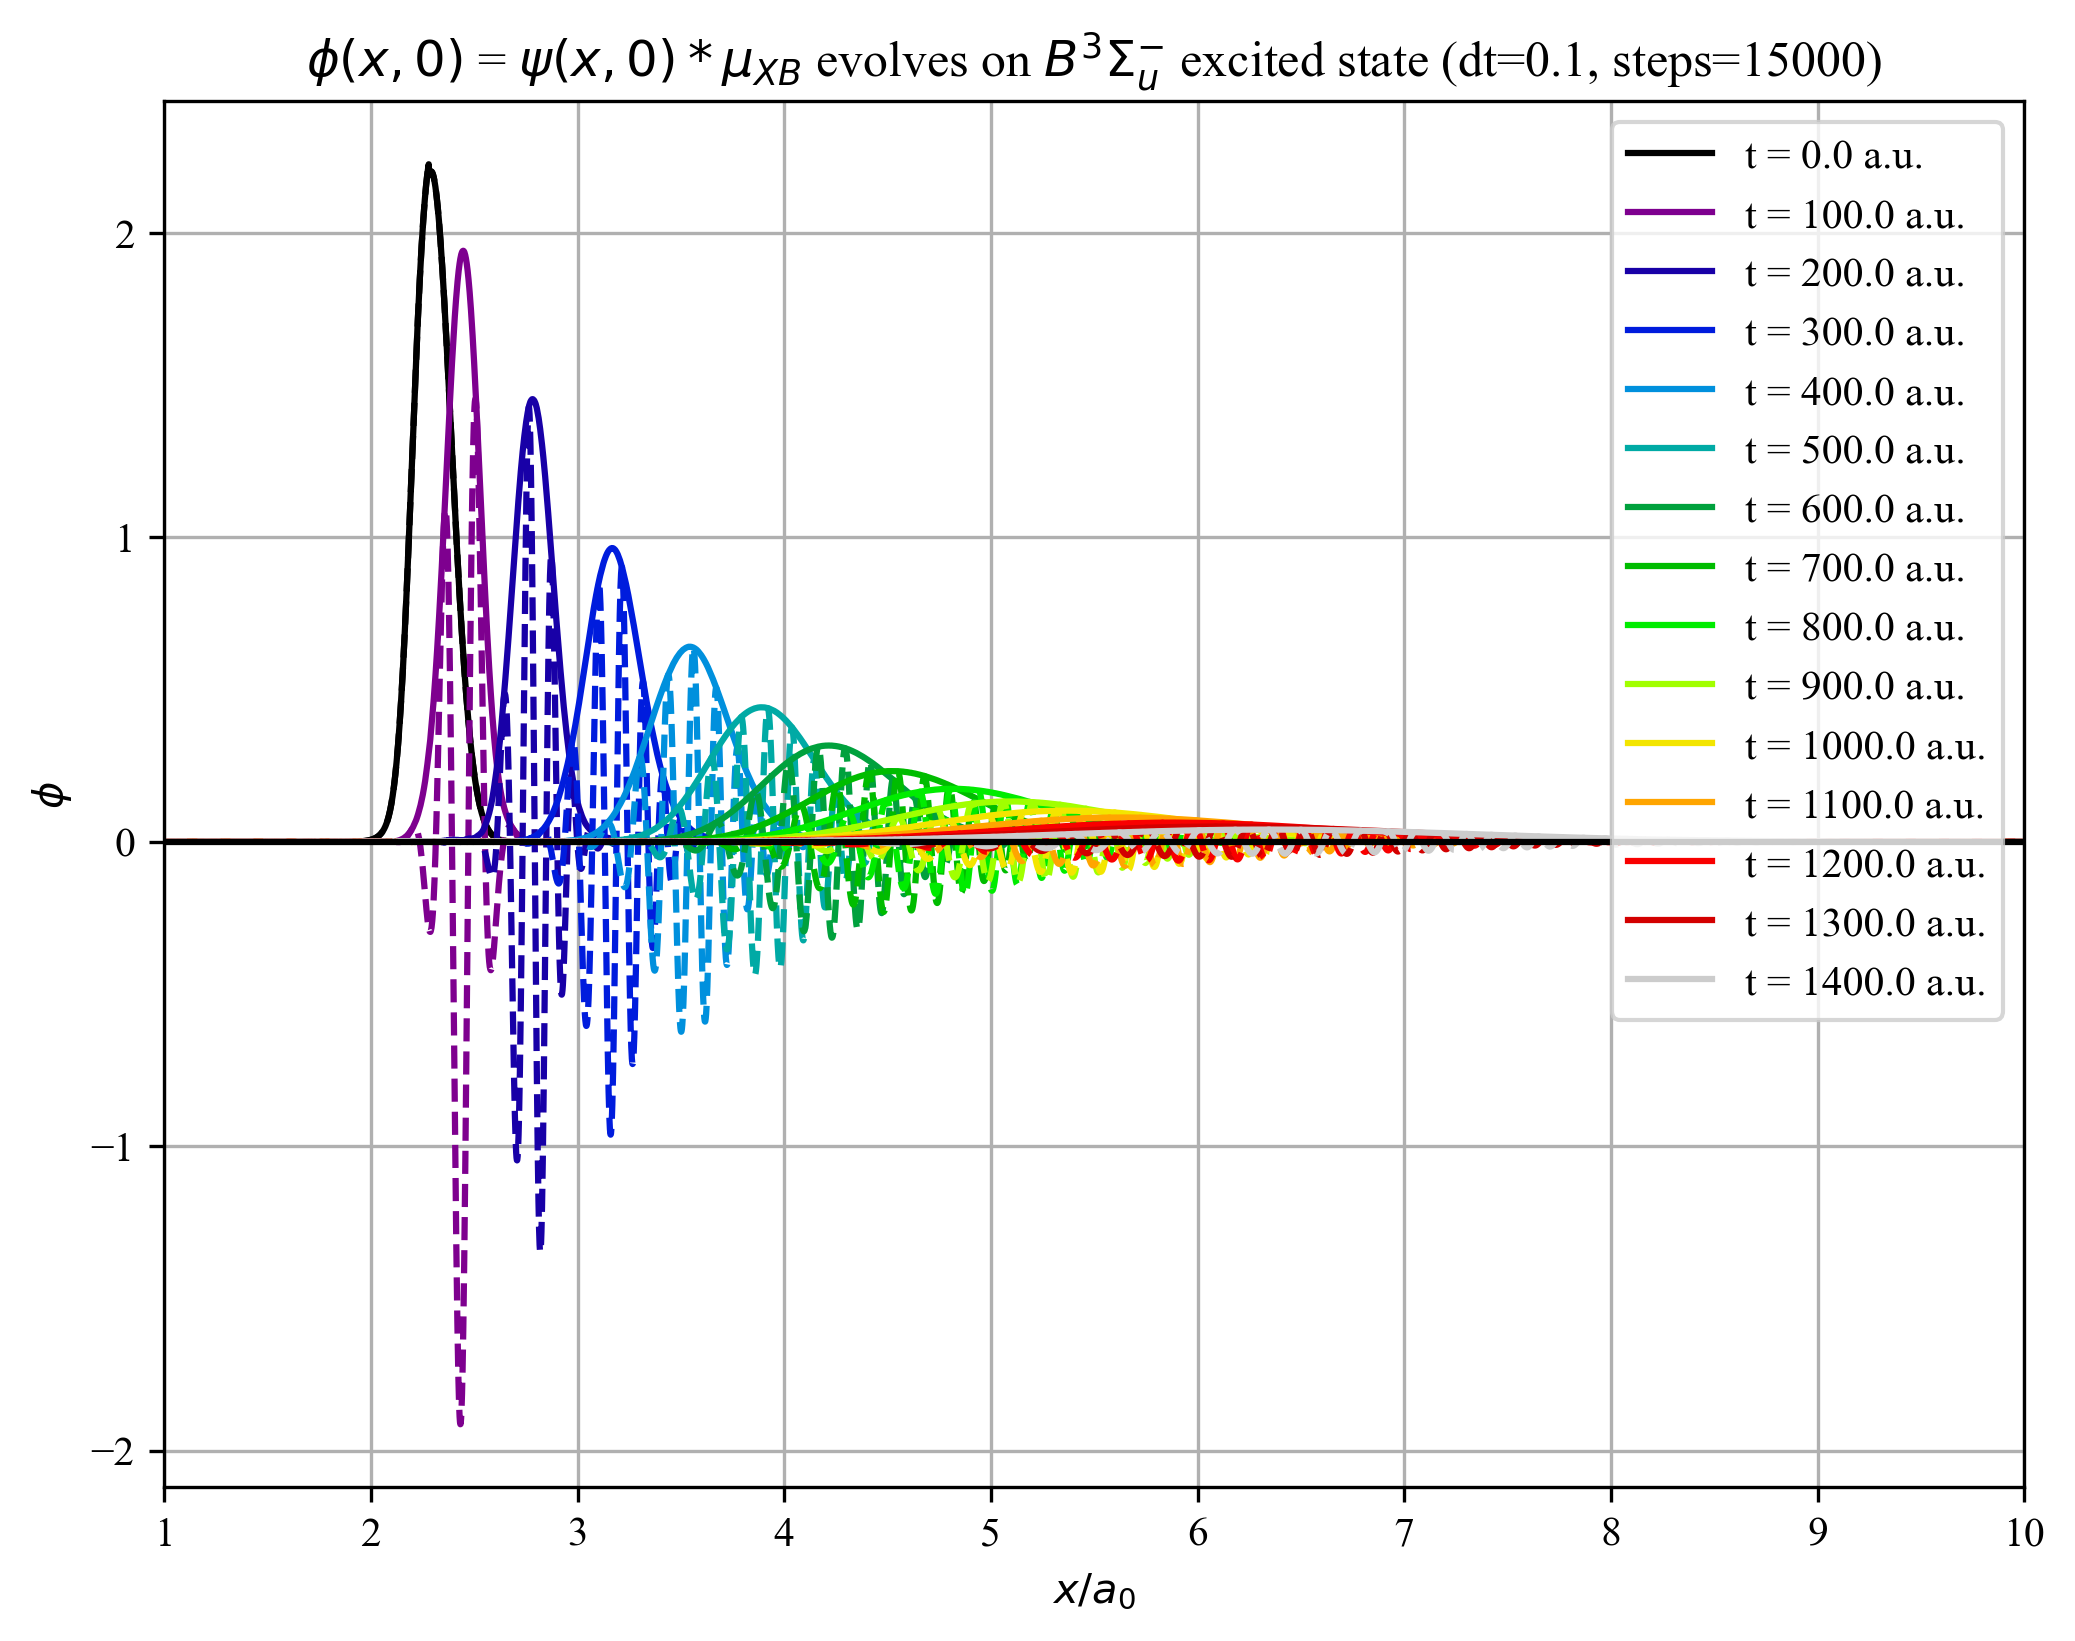

In [188]:


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})


plt.plot(x_grid,abs(wf_dynamics_exi[0]),label='t = 0.0 a.u.',c=[0.0, 0.0, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[0]),linestyle = '--', c=[0.0, 0.0, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[1000]),label='t = 100.0 a.u.',c=[0.4941235294117647, 0.0, 0.5607647058823529, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[1000]),linestyle = '--', c=[0.4941235294117647, 0.0, 0.5607647058823529, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[2000]),label='t = 200.0 a.u.',c=[0.0941117647058824, 0.0, 0.6549294117647059, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[2000]),linestyle = '--', c=[0.0941117647058824, 0.0, 0.6549294117647059, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[3000]),label='t = 300.0 a.u.',c=[0.0, 0.10981176470588236, 0.8667, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[3000]),linestyle = '--', c=[0.0, 0.10981176470588236, 0.8667, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[4000]),label='t = 400.0 a.u.',c=[0.0, 0.5634078431372549, 0.8667, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[4000]),linestyle = '--', c=[0.0, 0.5634078431372549, 0.8667, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[5000]),label='t = 500.0 a.u.',c=[0.0, 0.6667, 0.6483901960784313, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[5000]),linestyle = '--', c=[0.0, 0.6667, 0.6483901960784313, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[6000]),label='t = 600.0 a.u.',c=[0.0, 0.6300803921568627, 0.24050784313725487, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[6000]),linestyle = '--', c=[0.0, 0.6300803921568627, 0.24050784313725487, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[7000]),label='t = 700.0 a.u.',c=[0.0, 0.7385313725490196, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[7000]),linestyle = '--', c=[0.0, 0.7385313725490196, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[8000]),label='t = 800.0 a.u.',c=[0.0, 0.9268156862745098, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[8000]),linestyle = '--', c=[0.0, 0.9268156862745098, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[9000]),label='t = 900.0 a.u.',c=[0.6326509803921552, 1.0, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[9000]),linestyle = '--', c=[0.6326509803921552, 1.0, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[10000]),label='t = 1000.0 a.u.',c=[0.9516098039215687, 0.8967078431372549, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[10000]),linestyle = '--', c=[0.9516098039215687, 0.8967078431372549, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[11000]),label='t = 1100.0 a.u.',c=[1.0, 0.6470588235294118, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[11000]),linestyle = '--', c=[1.0, 0.6470588235294118, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[12000]),label='t = 1200.0 a.u.',c=[0.9764764705882353, 0.0, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[12000]),linestyle = '--', c=[0.9764764705882353, 0.0, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[13000]),label='t = 1300.0 a.u.',c=[0.827464705882353, 0.0, 0.0, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[13000]),linestyle = '--', c=[0.827464705882353, 0.0, 0.0, 1.0])
plt.plot(x_grid,abs(wf_dynamics_exi[14000]),label='t = 1400.0 a.u.',c=[0.8, 0.8, 0.8, 1.0])
plt.plot(x_grid,real(wf_dynamics_exi[14000]),linestyle = '--', c=[0.8, 0.8, 0.8, 1.0])

# Add styles for the graph
plt.title("$\phi(x,0)$ = $\psi(x,0)*\mu_{XB}$ evolves on $B^{3}Σ_{u}^{-}$ excited state (dt=0.1, steps=15000)")

plt.xlabel("$x/a_0$")
plt.ylabel('$\phi$')

plt.xlim([1,10])
#plt.ylim()

plt.grid(True, which='both')
plt.axhline(y=0, color='k')


plt.legend(loc='upper right')
plt.show()


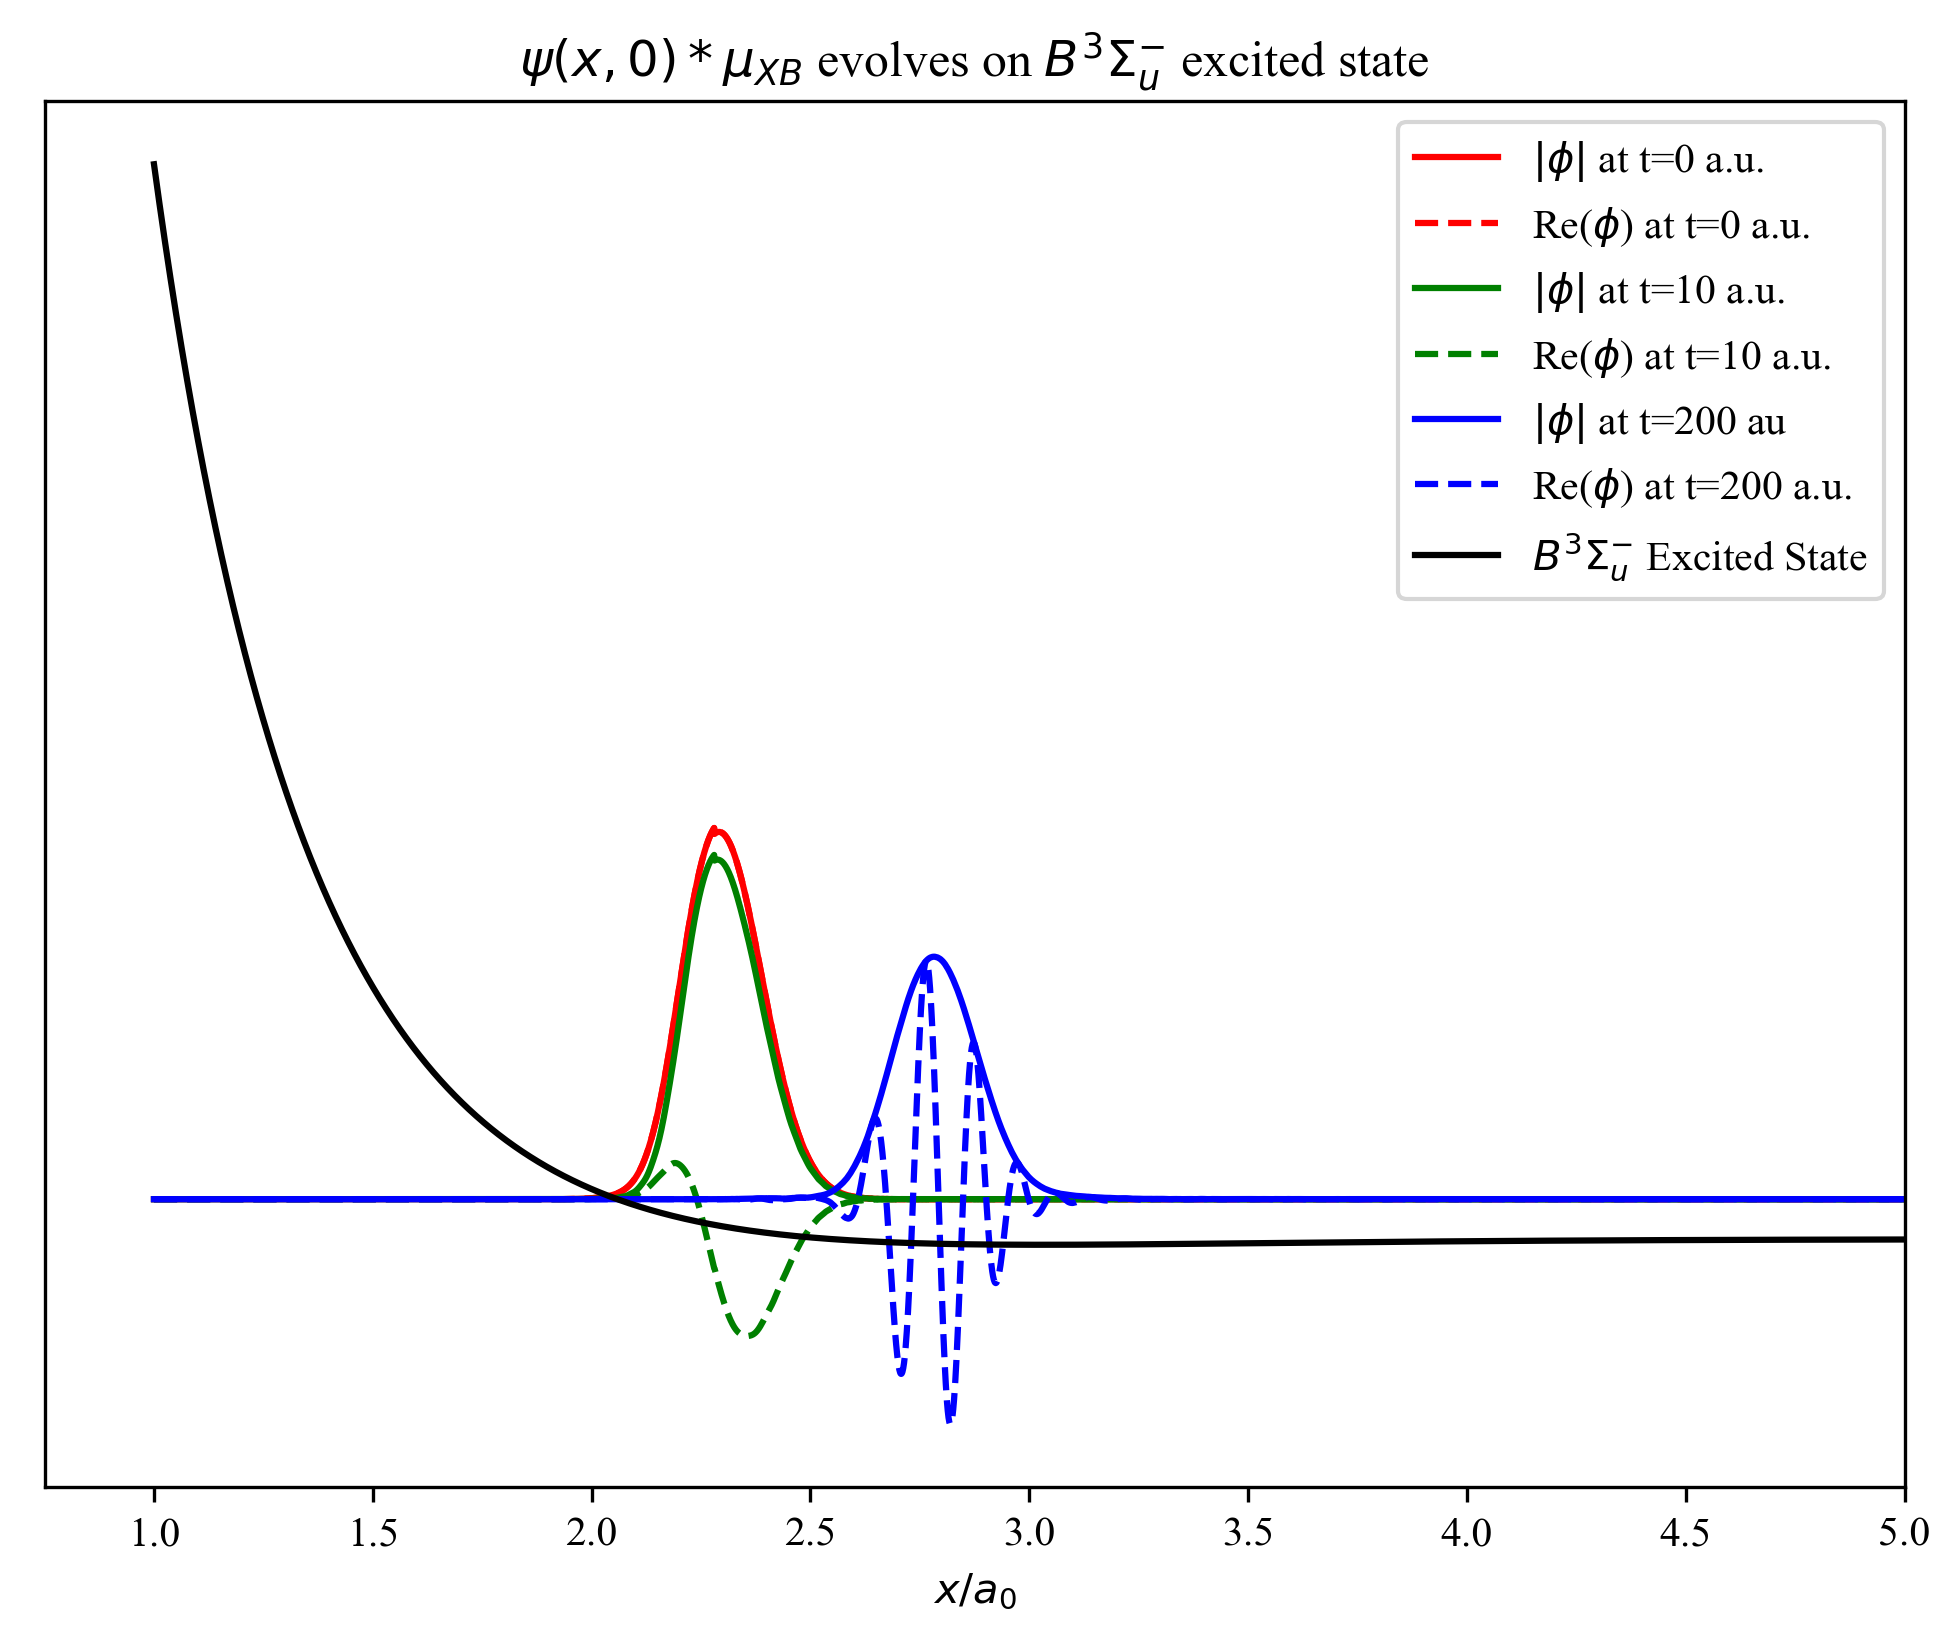

In [298]:


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})



plt.plot(x_grid,abs(wf_dynamics_exi[0])+0.6,color="red",label="$|\phi|$ at t=0 a.u.")
plt.plot(x_grid,real(wf_dynamics_exi[0])+0.6,color="red",linestyle="--",label="Re($\phi$) at t=0 a.u.")

plt.plot(x_grid,abs(wf_dynamics_exi[100])+0.6,color="green",label="$|\phi|$ at t=10 a.u.")
plt.plot(x_grid,real(wf_dynamics_exi[100])+0.6,color="green",linestyle="--",label="Re($\phi$) at t=10 a.u.")

plt.plot(x_grid,abs(wf_dynamics_exi[2000])+0.6,color="blue",label="$|\phi|$ at t=200 au")
plt.plot(x_grid,real(wf_dynamics_exi[2000])+0.6,color="blue",linestyle="--",label="Re($\phi$) at t=200 a.u.")

plt.plot(x_grid,V_excited(x_grid),color="black",label="$B^{3}Σ_{u}^{-}$ Excited State")


# Add styles for the graph
plt.title("$\psi(x,0)*\mu_{XB}$ evolves on $B^{3}Σ_{u}^{-}$ excited state")

plt.xlabel("$x/a_0$")
plt.yticks([])


plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')

plt.xlim([0.75,5])
#plt.ylim()

plt.axvline(x=0, color='k')

plt.legend()
plt.show()


### functions at ground state

In [134]:
dt=0.1
nsteps=15000

wf_dynamics=zeros((nsteps+1,len(x_grid)),dtype=complex128)
wf_dynamics[0]=wf_grd


for step in range(nsteps):
    psi=propagator(x_grid,wf_dynamics[step],m,dt,V_ground)
    wf_dynamics[step+1]=psi
    
wf_dynamics[1:] = wf_dynamics[1:]

#animate_dynamics(x_grid,wf_dynamics_exi,dt,V_excited(x_grid))

In [149]:
color = iter(cm.coolwarm(np.linspace(0, 1, 15)))


for i in range(15):
    c = next(color)
    ans = "plt.plot(x_grid,wf_dynamics["+str(i*100)+ r"],label='t = "+str(i*100*dt) + r" a.u.',c="+str(list(c))+')'
    print(ans)

plt.plot(x_grid,wf_dynamics[0],label='t = 0.0 a.u.',c=[0.2298057, 0.298717966, 0.753683153, 1.0])
plt.plot(x_grid,wf_dynamics[100],label='t = 10.0 a.u.',c=[0.31394635112941177, 0.4200516616941176, 0.8549925410352941, 1.0])
plt.plot(x_grid,wf_dynamics[200],label='t = 20.0 a.u.',c=[0.4044212904941176, 0.5346434904470588, 0.9320019126352941, 1.0])
plt.plot(x_grid,wf_dynamics[300],label='t = 30.0 a.u.',c=[0.500030564517647, 0.6385084675764706, 0.9810701241058823, 1.0])
plt.plot(x_grid,wf_dynamics[400],label='t = 40.0 a.u.',c=[0.603162067917647, 0.7315274773529412, 0.9995652785372549, 1.0])
plt.plot(x_grid,wf_dynamics[500],label='t = 50.0 a.u.',c=[0.6984540864549019, 0.7994498841137254, 0.9845774567019608, 1.0])
plt.plot(x_grid,wf_dynamics[600],label='t = 60.0 a.u.',c=[0.7867207013568628, 0.8448072103686275, 0.9398103849490196, 1.0])
plt.plot(x_grid,wf_dynamics[700],label='t = 70.0 a.u.',c=[0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0])
plt.plot(x_grid,wf_dynamics[800],lab

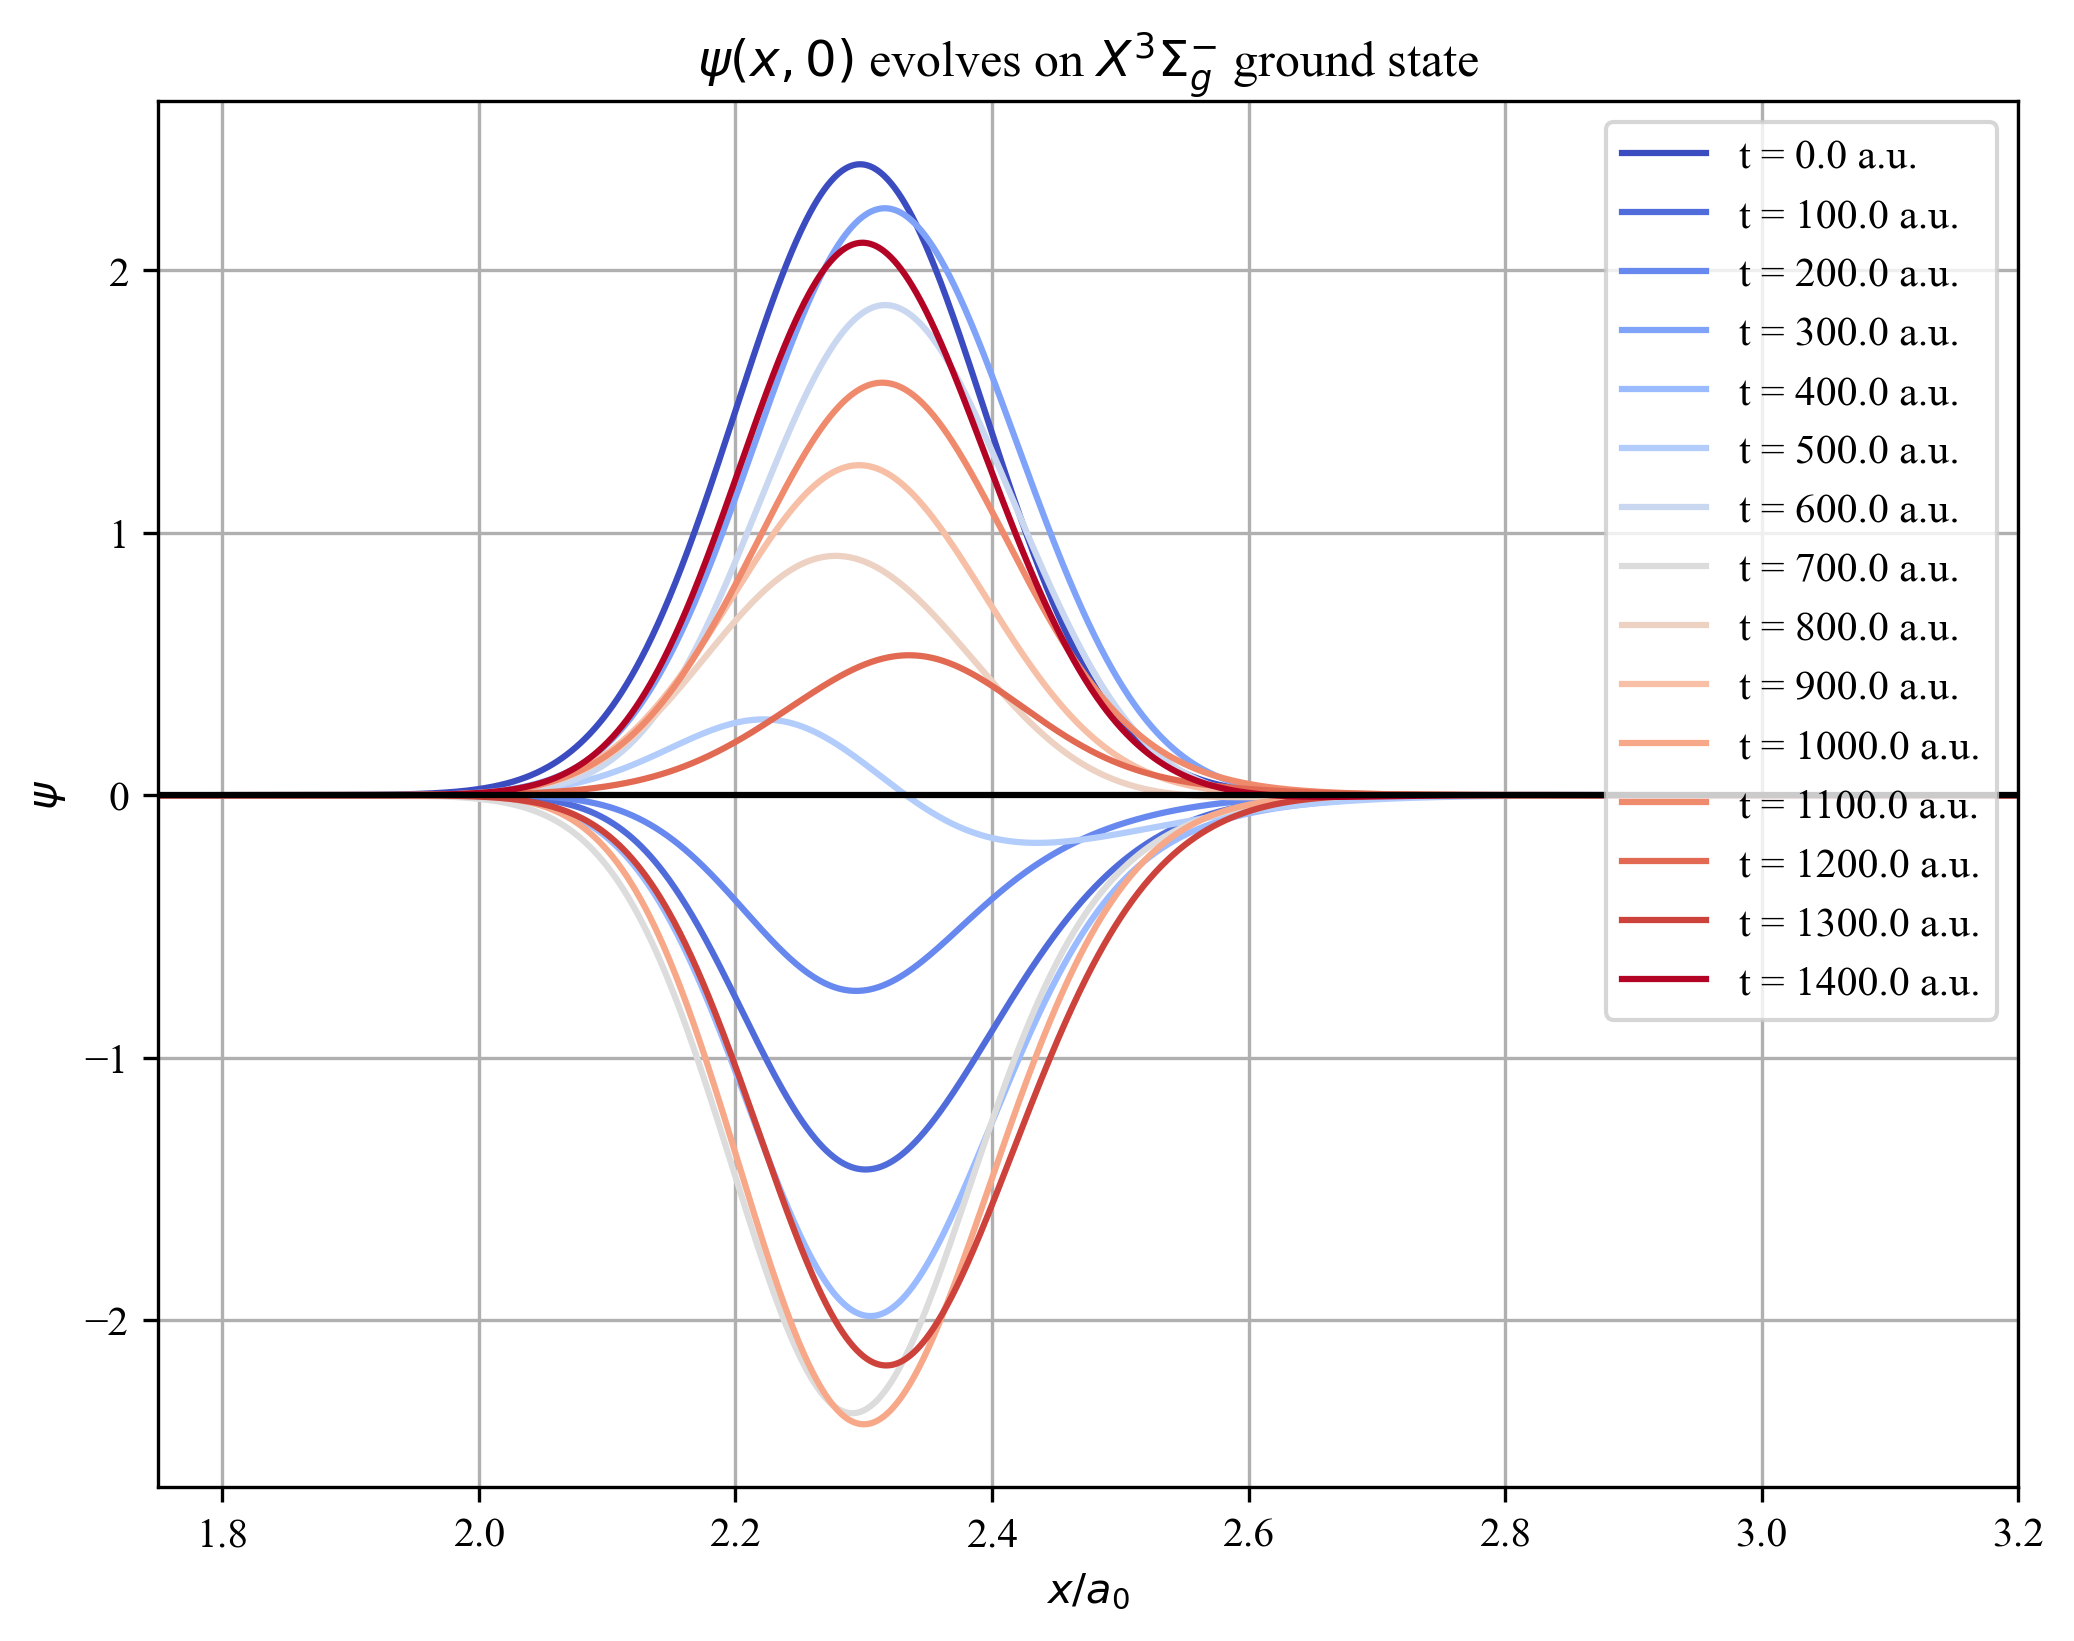

In [146]:


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})


plt.plot(x_grid,wf_dynamics[0],label='t = 0.0 a.u.',c=[0.2298057, 0.298717966, 0.753683153, 1.0])
plt.plot(x_grid,wf_dynamics[1000],label='t = 100.0 a.u.',c=[0.31394635112941177, 0.4200516616941176, 0.8549925410352941, 1.0])
plt.plot(x_grid,wf_dynamics[2000],label='t = 200.0 a.u.',c=[0.4044212904941176, 0.5346434904470588, 0.9320019126352941, 1.0])
plt.plot(x_grid,wf_dynamics[3000],label='t = 300.0 a.u.',c=[0.500030564517647, 0.6385084675764706, 0.9810701241058823, 1.0])
plt.plot(x_grid,wf_dynamics[4000],label='t = 400.0 a.u.',c=[0.603162067917647, 0.7315274773529412, 0.9995652785372549, 1.0])
plt.plot(x_grid,wf_dynamics[5000],label='t = 500.0 a.u.',c=[0.6984540864549019, 0.7994498841137254, 0.9845774567019608, 1.0])
plt.plot(x_grid,wf_dynamics[6000],label='t = 600.0 a.u.',c=[0.7867207013568628, 0.8448072103686275, 0.9398103849490196, 1.0])
plt.plot(x_grid,wf_dynamics[7000],label='t = 700.0 a.u.',c=[0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0])
plt.plot(x_grid,wf_dynamics[8000],label='t = 800.0 a.u.',c=[0.9306685963333333, 0.818876999654902, 0.7591463906980392, 1.0])
plt.plot(x_grid,wf_dynamics[9000],label='t = 900.0 a.u.',c=[0.9637718182823529, 0.7490855105725491, 0.6494200432901962, 1.0])
plt.plot(x_grid,wf_dynamics[10000],label='t = 1000.0 a.u.',c=[0.9673165156666667, 0.6574708288078431, 0.5381601507294118, 1.0])
plt.plot(x_grid,wf_dynamics[11000],label='t = 1100.0 a.u.',c=[0.9392537715176471, 0.5395814885647059, 0.4239002049294118, 1.0])
plt.plot(x_grid,wf_dynamics[12000],label='t = 1200.0 a.u.',c=[0.8846434386941177, 0.41001709788235297, 0.32250654924705885, 1.0])
plt.plot(x_grid,wf_dynamics[13000],label='t = 1300.0 a.u.',c=[0.8057229630470588, 0.2598131362588235, 0.2305616574, 1.0])
plt.plot(x_grid,wf_dynamics[14000],label='t = 1400.0 a.u.',c=[0.705673158, 0.01555616, 0.150232812, 1.0])


# Add styles for the graph
plt.title("$\psi(x,0)$ evolves on $X^{3}Σ_{g}^{-}$ ground state")

plt.xlabel("$x/a_0$")
plt.ylabel('$\psi$')

plt.xlim([1.75,3.2])
#plt.ylim()

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend(loc='upper right')
plt.show()


## Get the power spectrum

#### first trial results

In [ ]:
autocor_int = trapz(conj(wf_dynamics_exi[0])*wf_dynamics_exi[:],x_grid)
gauss_w=ifftshift(ifft(autocor_int,norm="ortho"))
frequency=2 * pi * fftshift(fftfreq(nsteps+1,d=dt))

xlim([0,1])

plot(frequency,gauss_w,marker = '.')

In [23]:
E_grd

0.10002591952445683

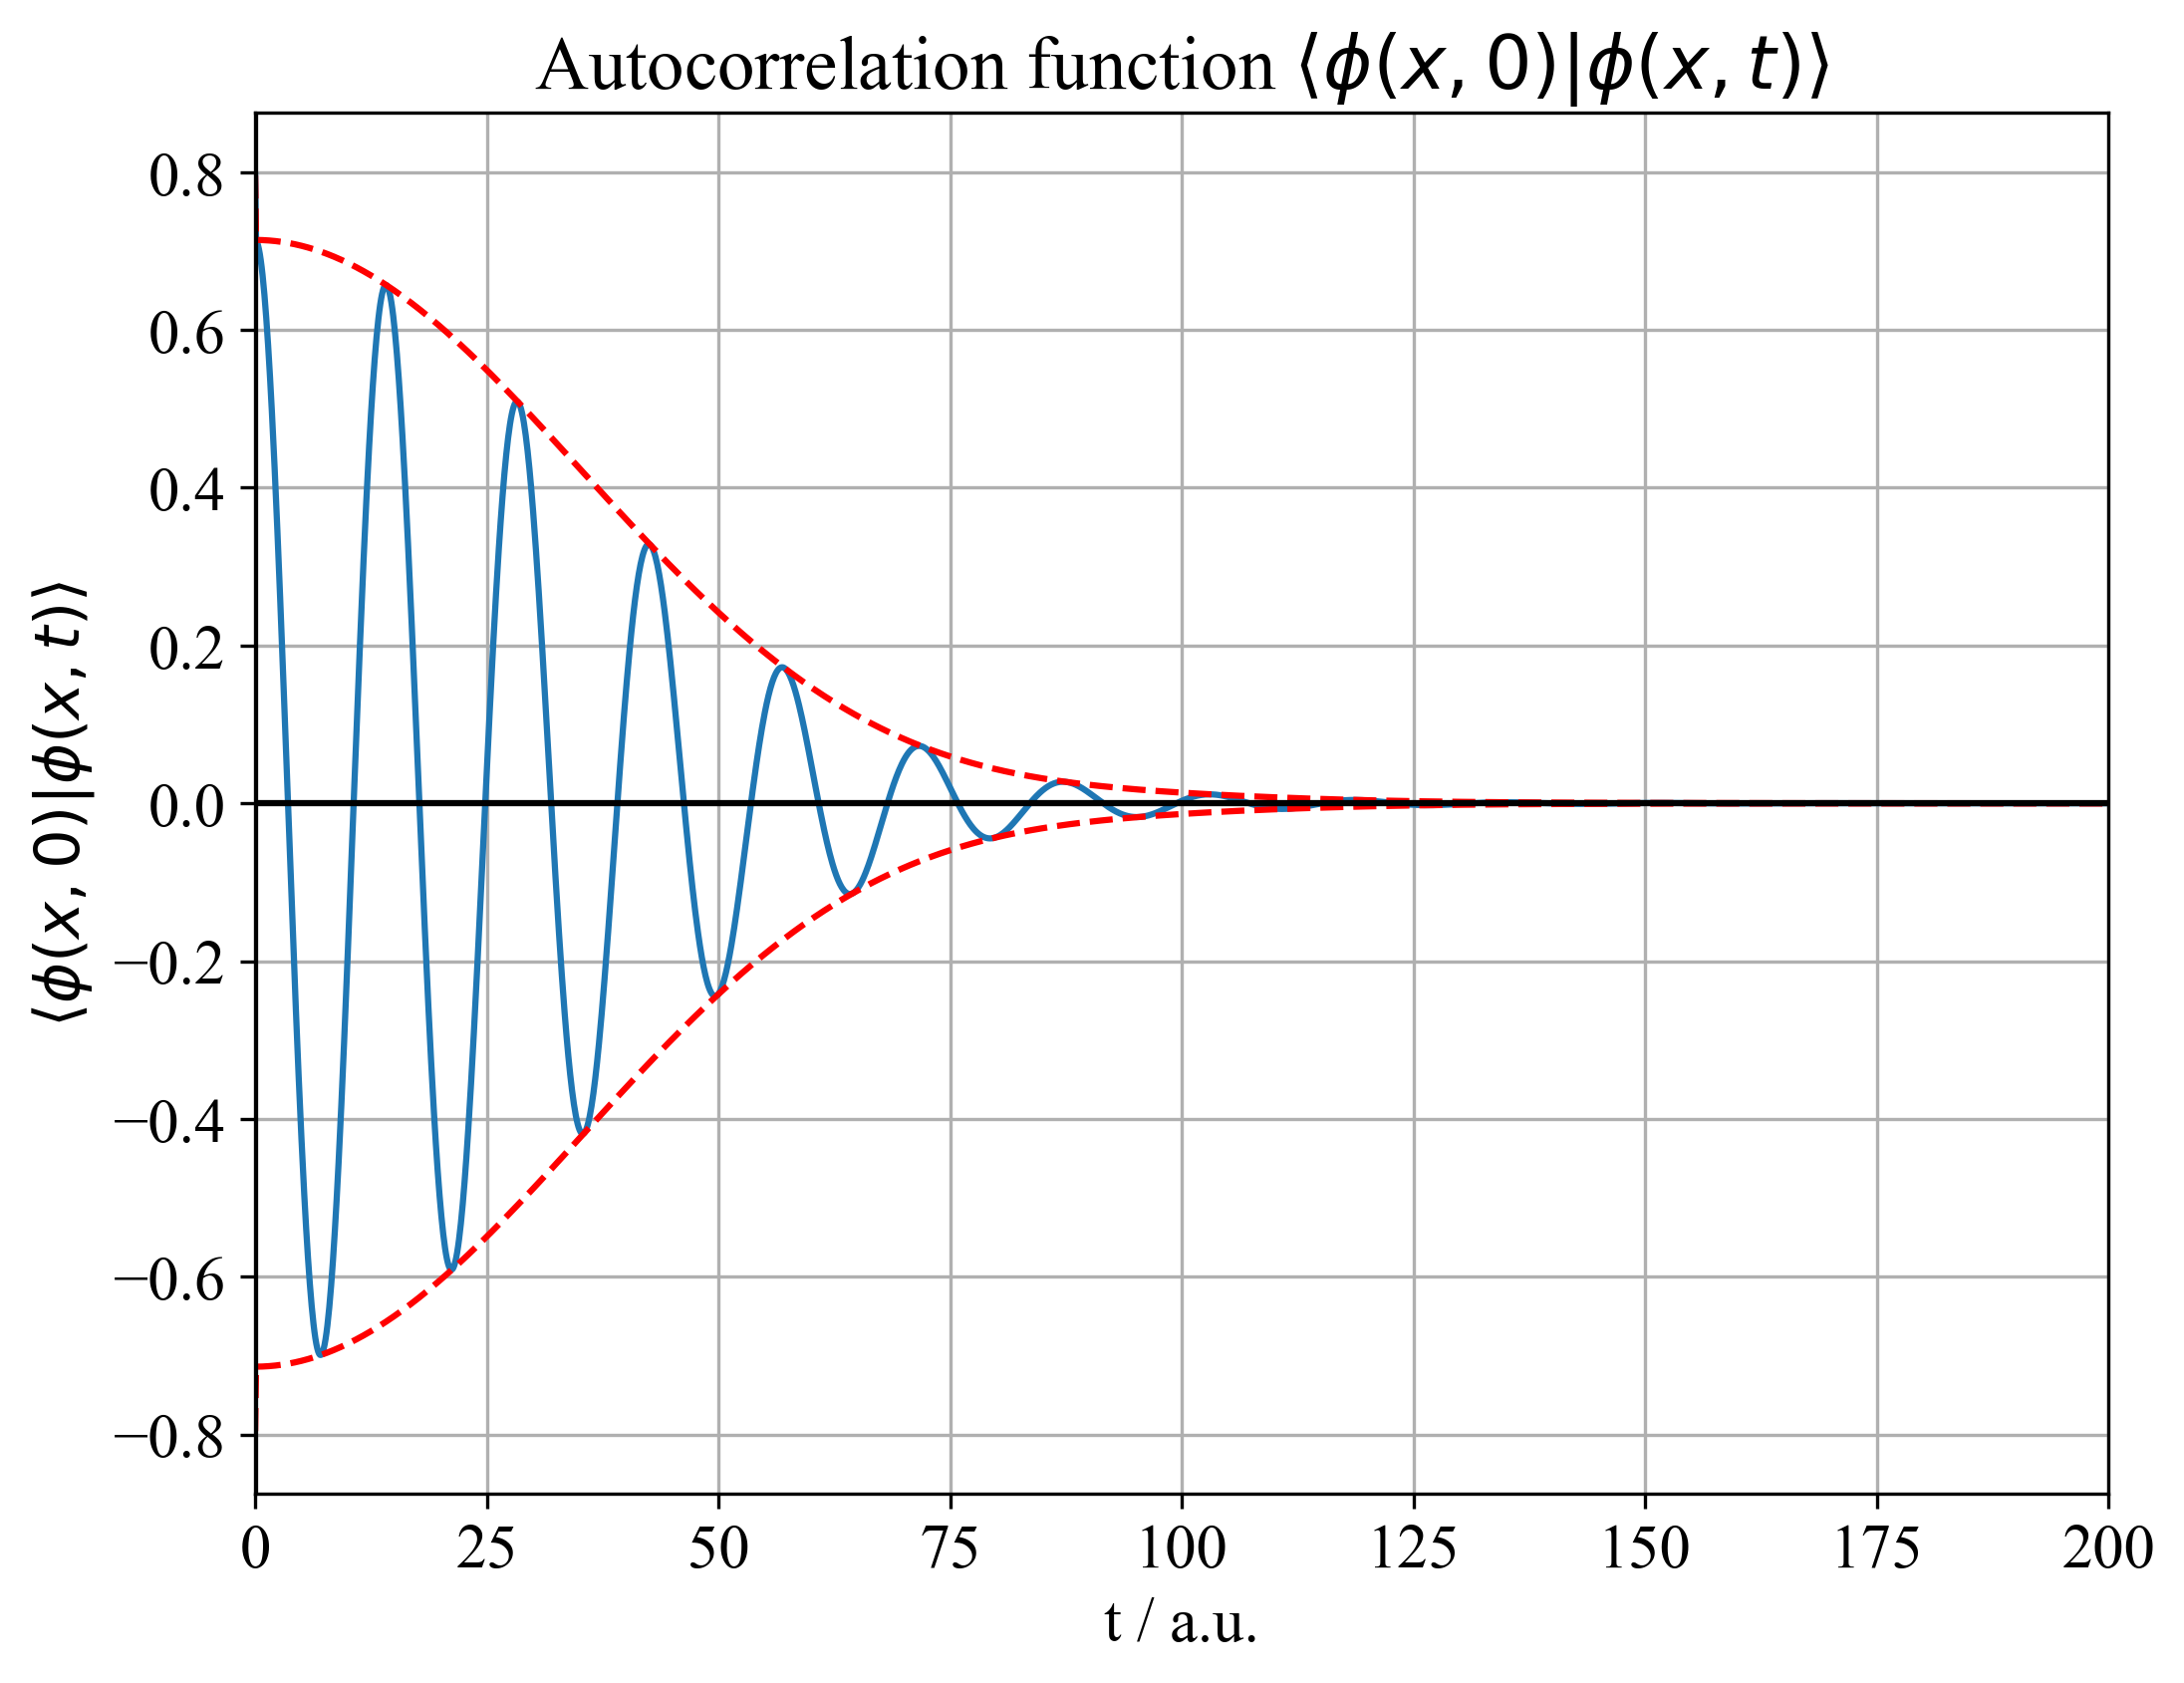

In [194]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plt.plot(t_series,real(autocor_int))
plt.plot(t_series,abs(autocor_int),linestyle='--',color='r')
plt.plot(t_series,-abs(autocor_int),linestyle='--',color='r')

# Add styles for the graph
plt.title(r'Autocorrelation function $\langle\phi(x,0)|\phi(x,t)\rangle$')

plt.ylabel(r'$\langle\phi(x,0)|\phi(x,t)\rangle$')
plt.xlabel('t / a.u.')

plt.xlim([0,200])
#plt.ylim()


plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

#plt.legend()
plt.show()

In [128]:
print(gauss_w.argmax())

frequency[7606]


7606


0.4439821628964976

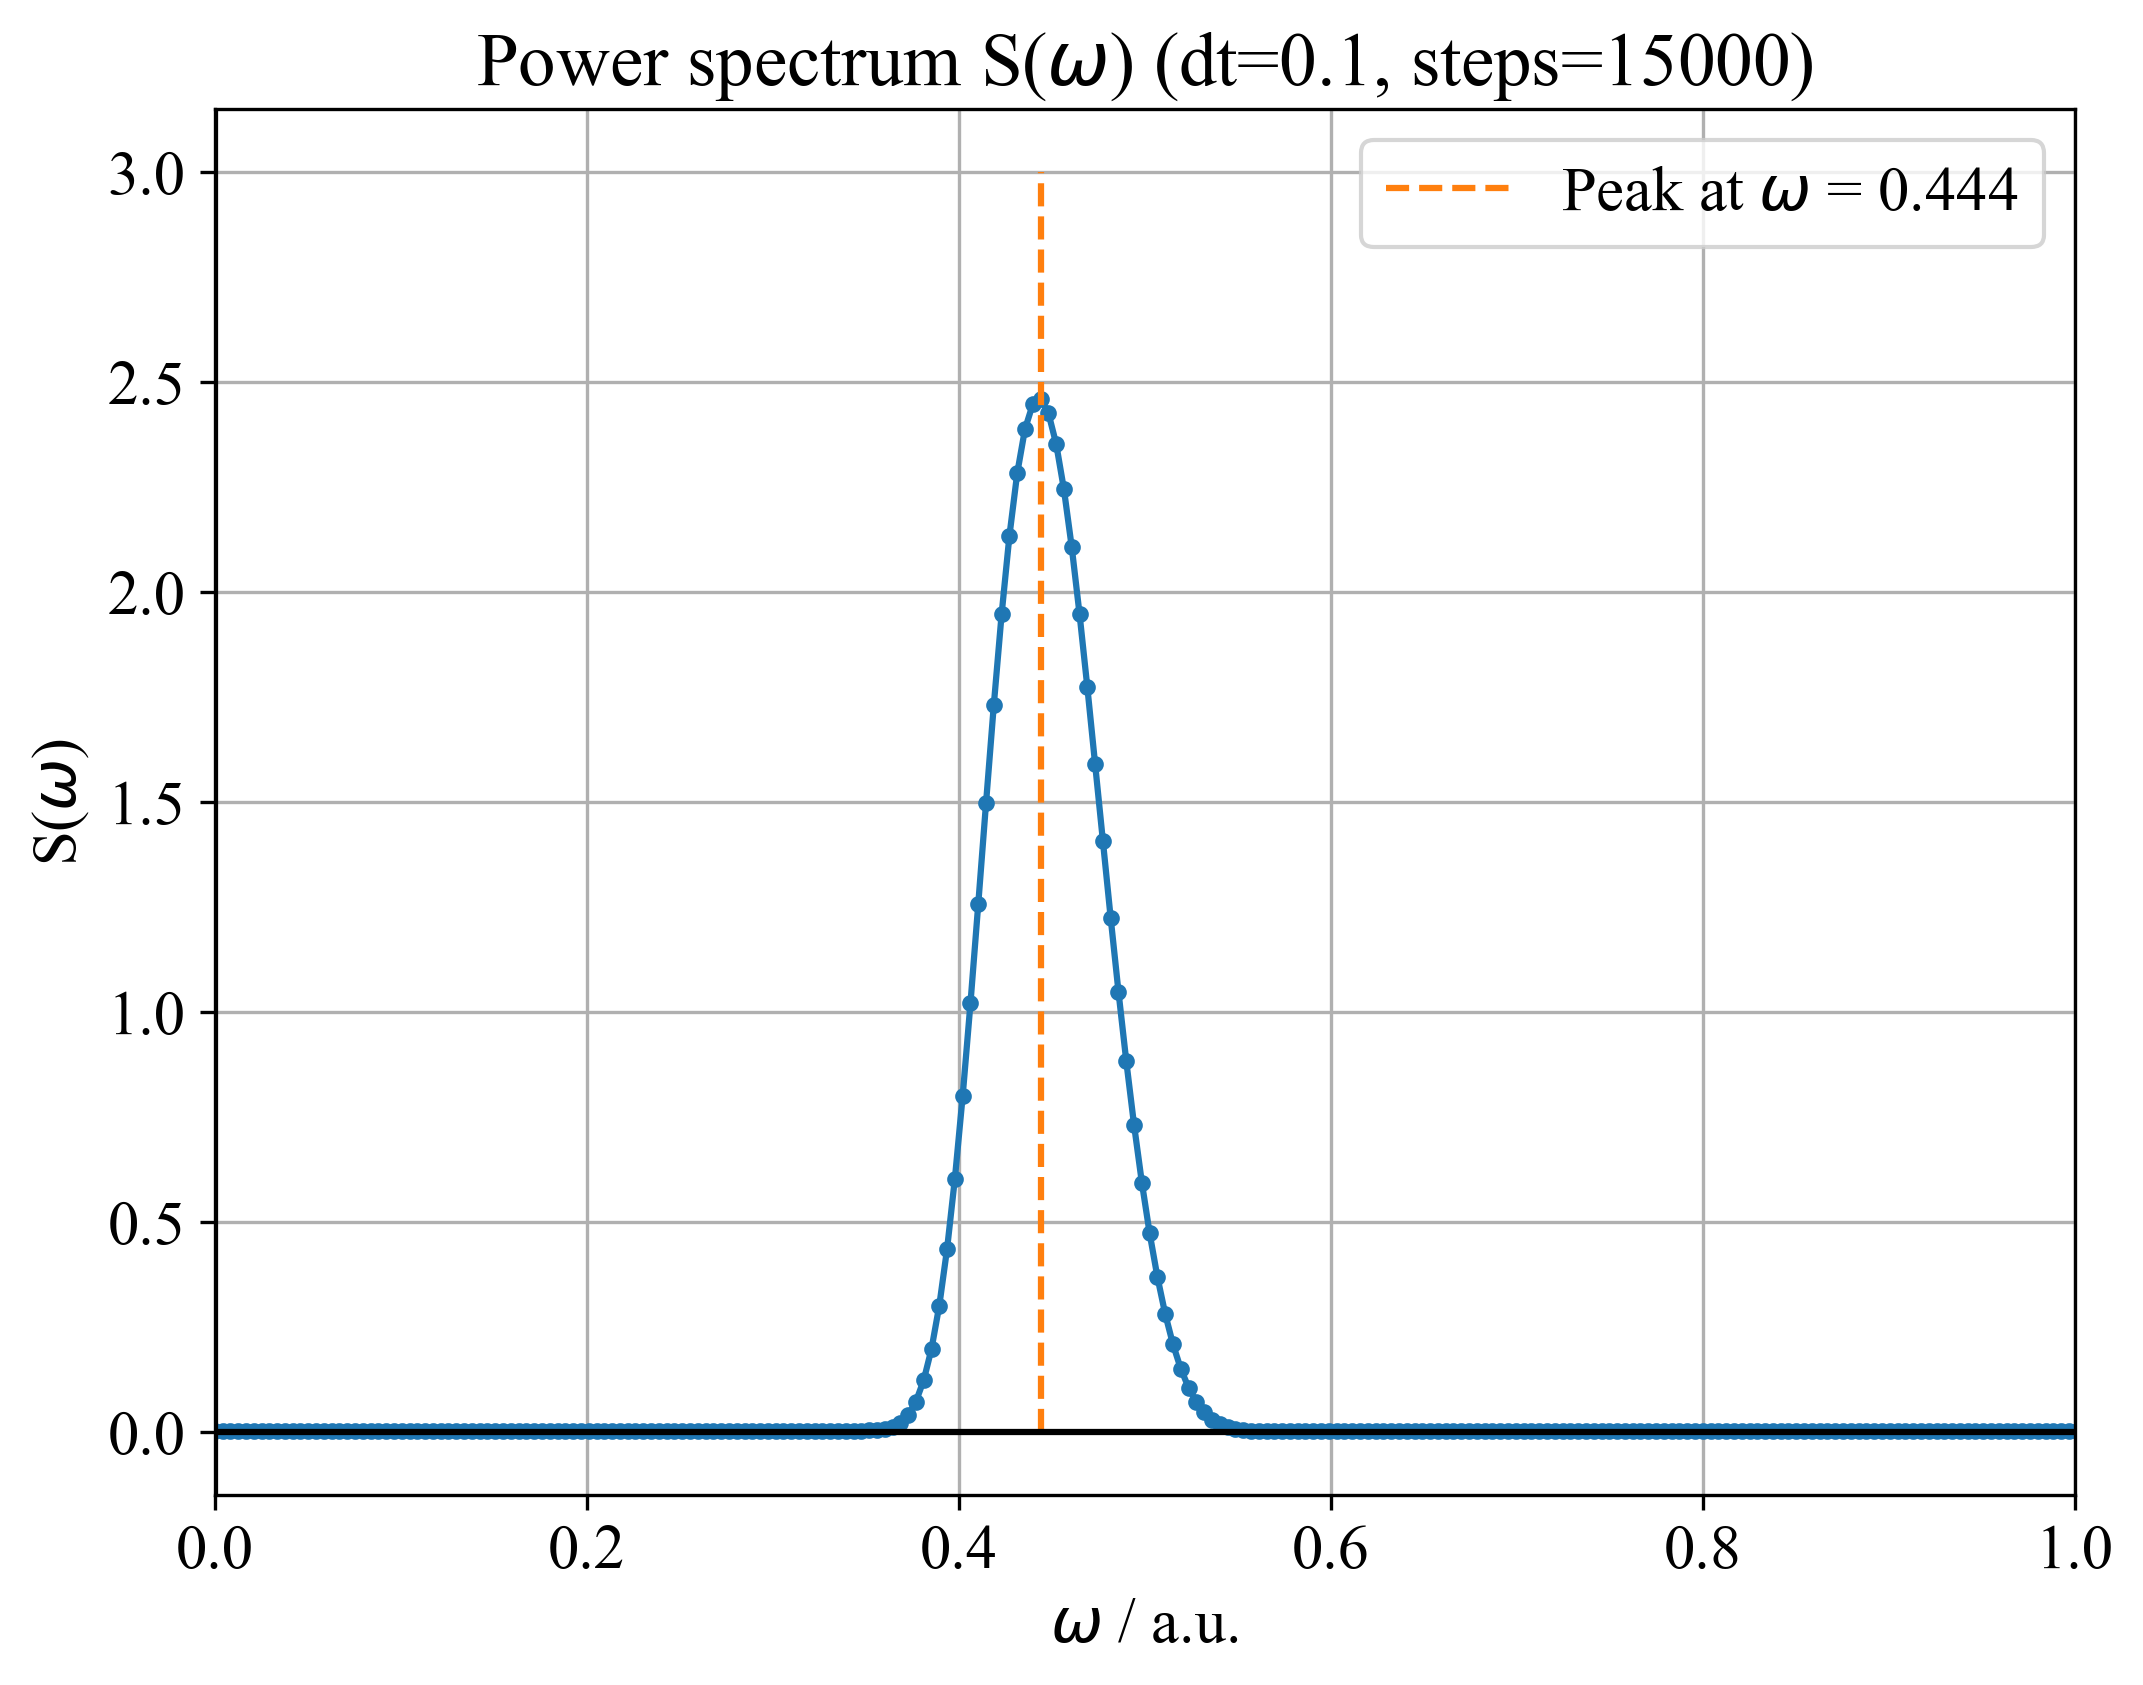

In [189]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})


plot(frequency,gauss_w,marker = '.')
plot(array([0.4439821628964976,0.4439821628964976]), array([0,3]),linestyle = '--', label=r'Peak at $\omega$ = 0.444')
# Add styles for the graph
plt.title(r'Power spectrum S($\omega$) (dt=0.1, steps=15000)')

plt.ylabel('S($\omega$)')
plt.xlabel('$\omega$ / a.u.')

plt.xlim([0,1])
#plt.ylim()


plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend()
plt.show()

### Absoption Spectrum

In [199]:
print(gauss_w_subsEgrd.argmax())

frequency[7606]-E_grd


7606


0.3439562433720408

In [204]:
autocor_int = trapz(conj(wf_dynamics_exi[0])*wf_dynamics_exi[:],x_grid)
gauss_w=ifftshift(ifft(autocor_int,norm="ortho"))
frequency=2 * pi * fftshift(fftfreq(nsteps+1,d=dt))


te = 0.1
E_grd = 1/2 * (k_grnd()/m) + te

AbsoSpec = (2*pi*frequency)/(3*137.037) * gauss_w *(2*pi)**0.5



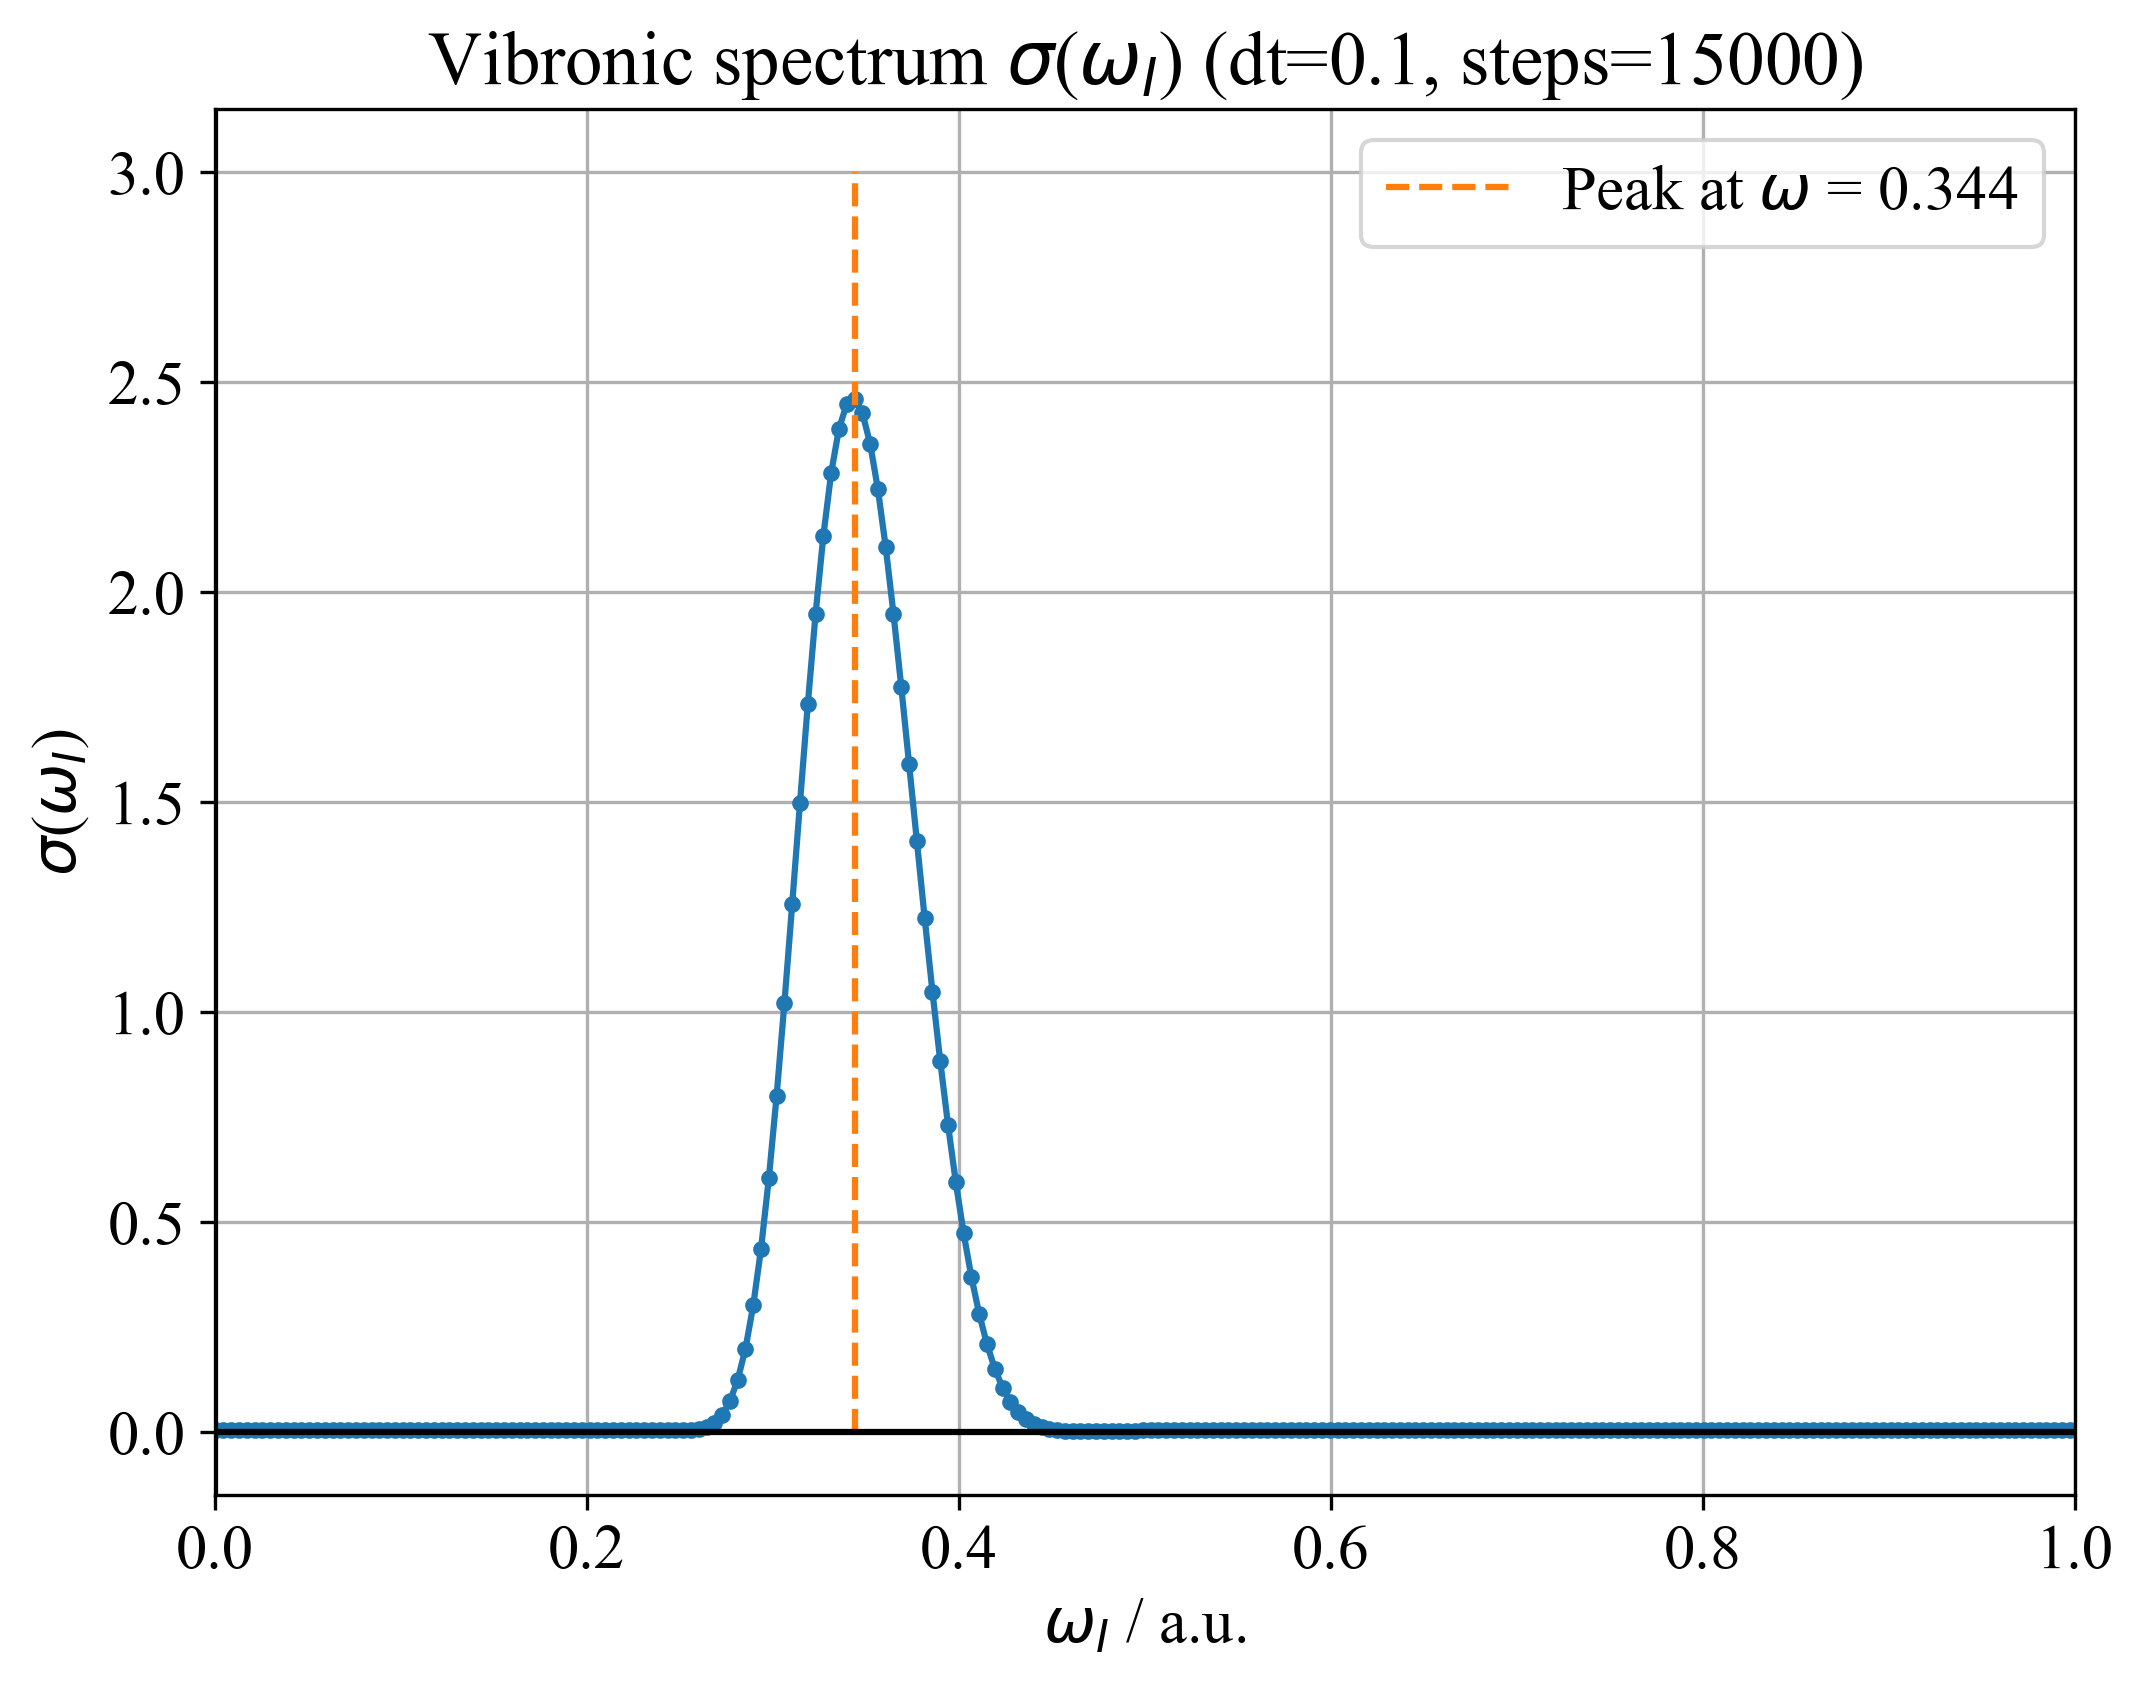

In [203]:
#plot the graph -------------------------------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})



plot((frequency-E_grd),gauss_w,marker = '.')

plot(array([0.3439562433720408,0.3439562433720408]), array([0,3]),linestyle = '--', label=r'Peak at $\omega$ = 0.344')
# Add styles for the graph
plt.title(r'Vibronic spectrum $\sigma$($\omega_I$) (dt=0.1, steps=15000)')

plt.ylabel('$\sigma$($\omega_I$)')
plt.xlabel('$\omega_I$ / a.u.')

plt.xlim([0,1])
#plt.ylim()


plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend()
plt.show()

### Find peaks and find peak value of the frquency

In [223]:
from scipy.signal import find_peaks

gauss_w_subsEgrd.argmax()

peakmax = frequency-E_grd
peak_value = peakmax[7606]
peak_value

0.3439562433720408

### Give the power spec.

1. a qualitative description of how the wavefunction changes with time and how this relate to the spectrum. 

1.1 to consider the main dynamics features, but also the details of the dynamics inside the excited state potential well.

- (i.e. autocorrelation function) or explicitly calculated in your analysis. 
- expectation value of the position changes with times; 
- or how the spread in positions changes in time.

### Expectation value for the position

D:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


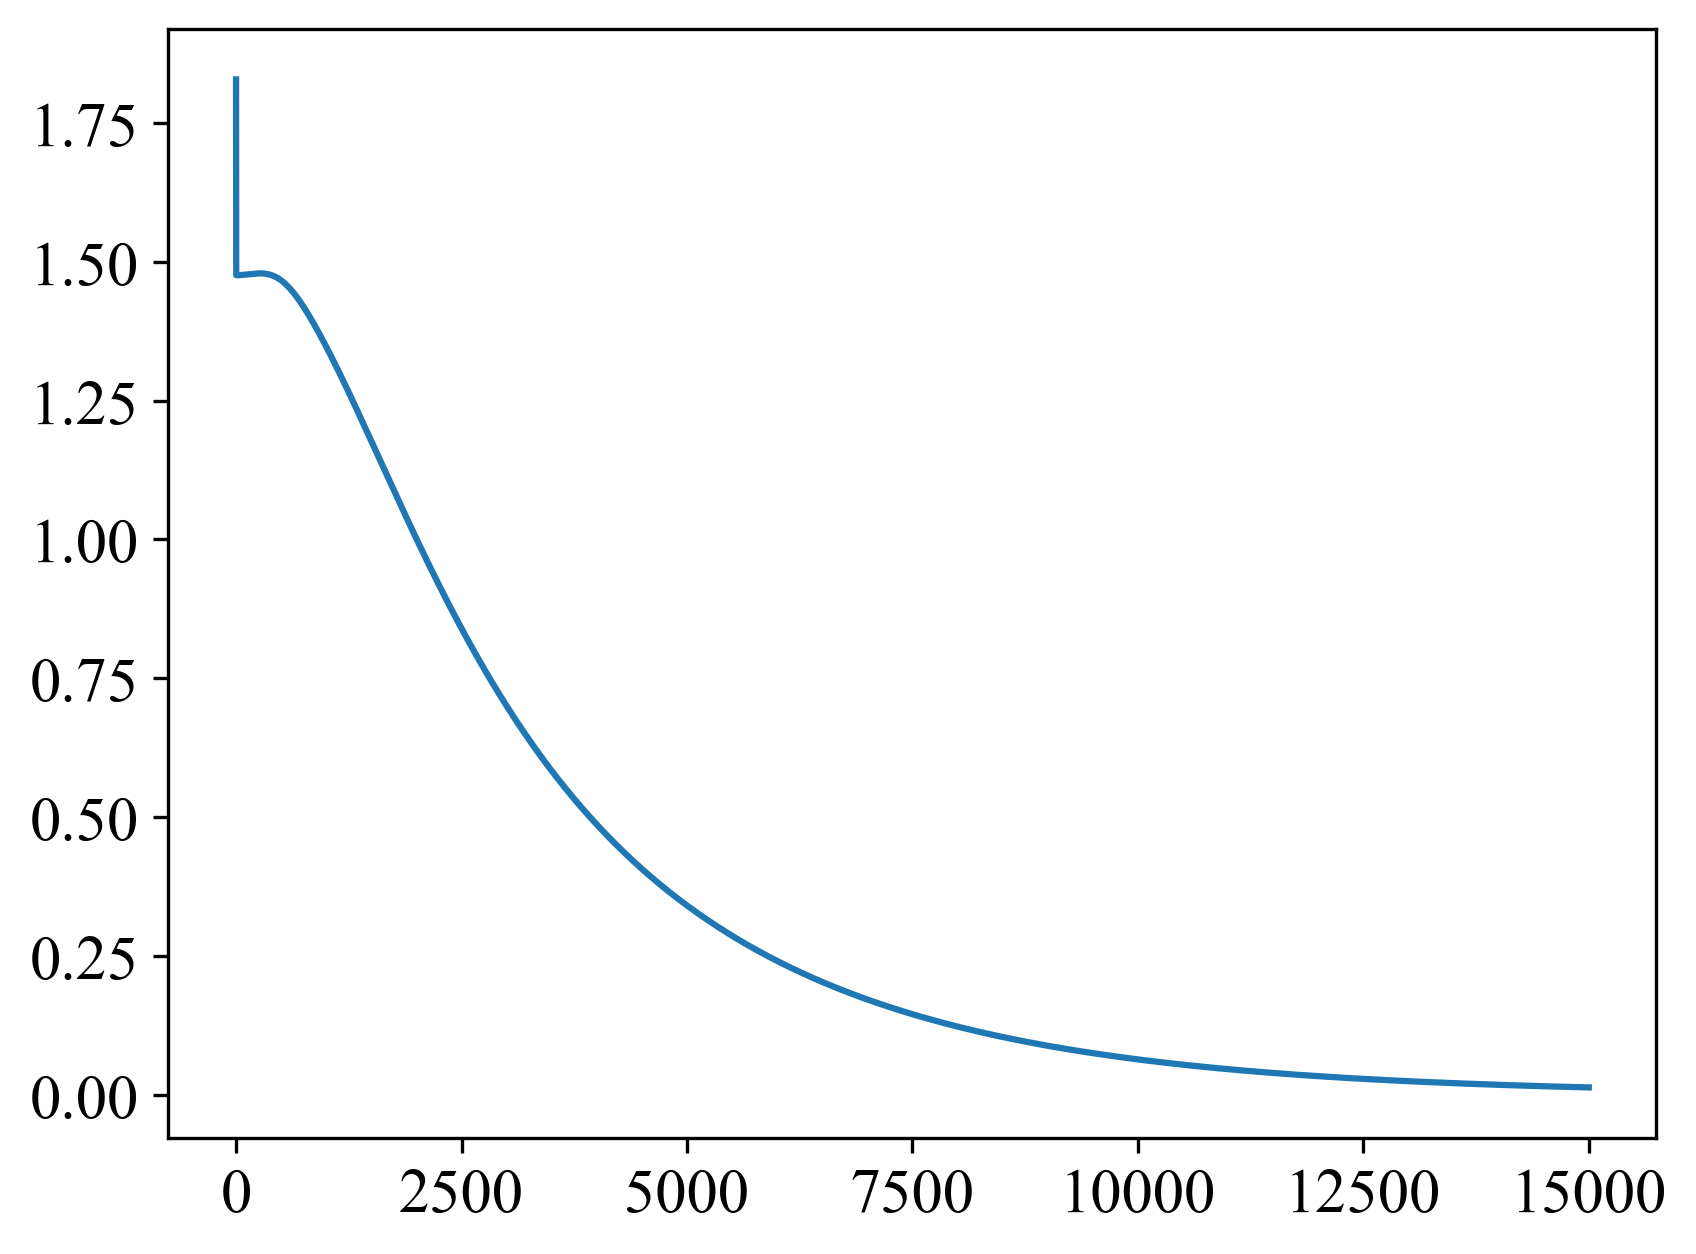

In [206]:
def exp_x(i):
    del_x_02 = trapz(conj(wf_dynamics_exi[i]) * x_grid * wf_dynamics_exi[i],x_grid)
    return del_x_02


expected_x_list = []

for i in range(len(wf_dynamics_exi)):
    expected_x_list.append(exp_x(i))

plot(expected_x_list)

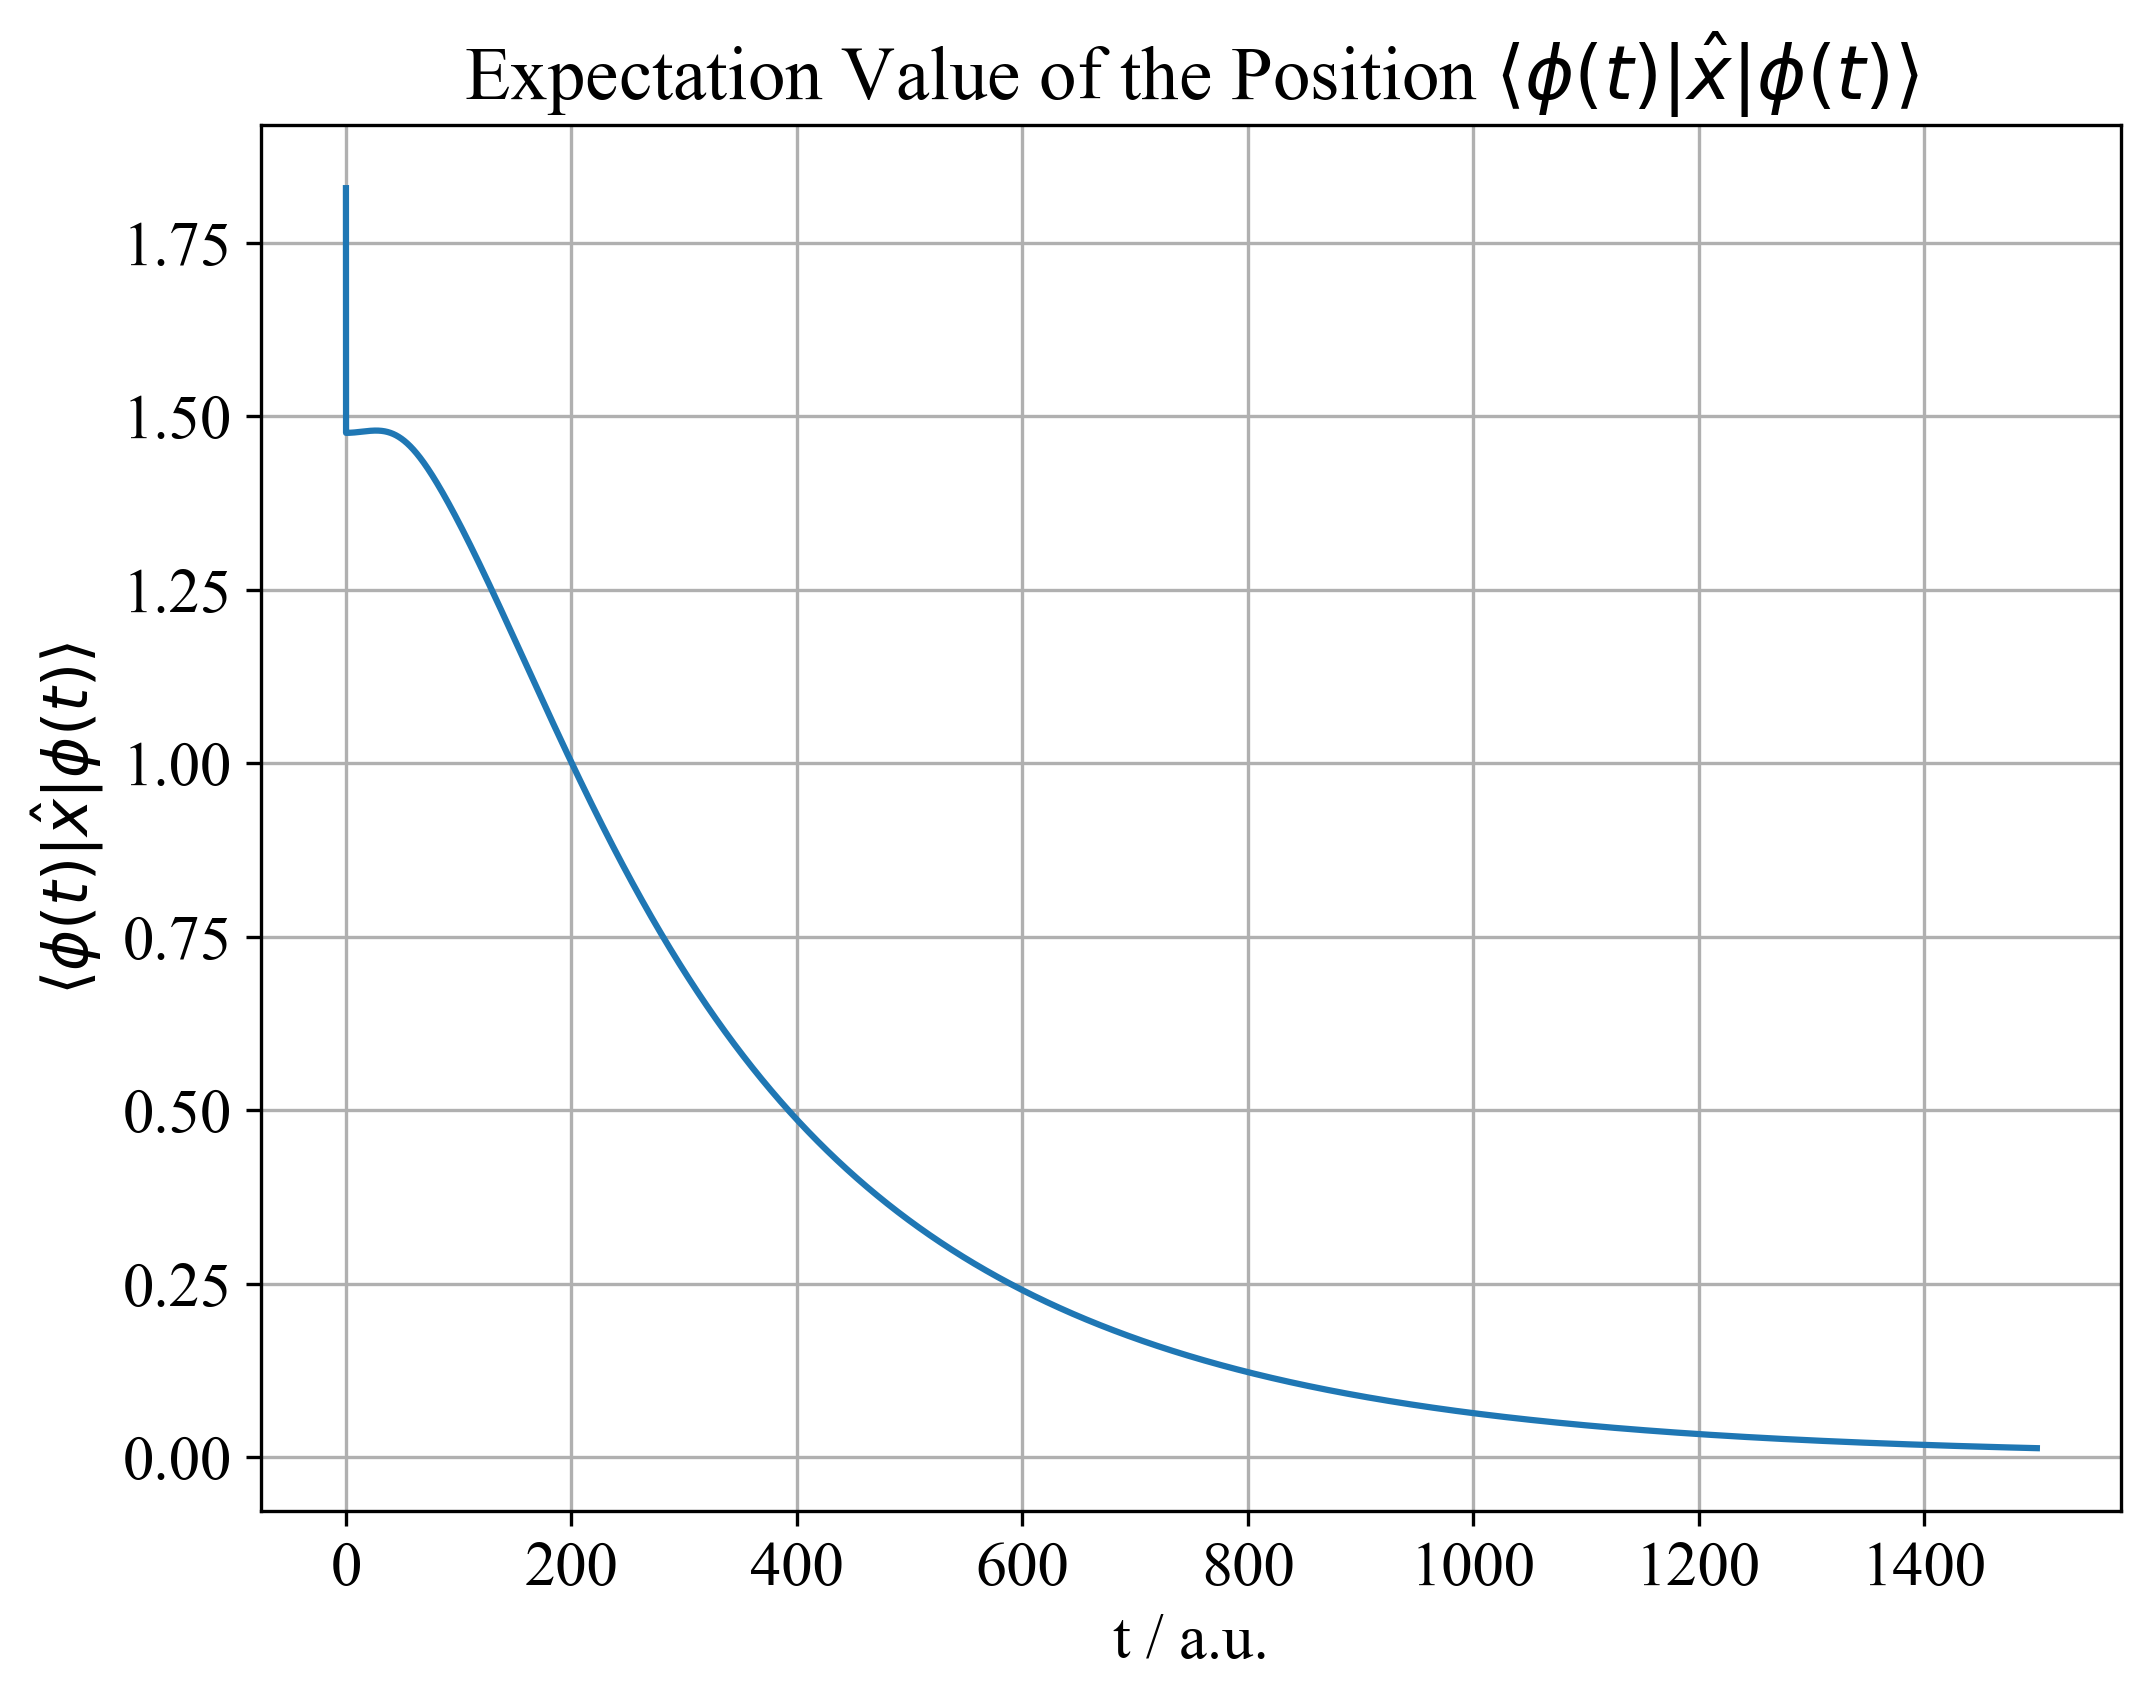

In [214]:
#plot the graph -------------------------------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})



plot(t_series,expected_x_list)

# Add styles for the graph
plt.title(r'Expectation Value of the Position $\langle\phi(t)|\hat{x}|\phi(t)\rangle$')

plt.ylabel(r'$\langle\phi(t)|\hat{x}|\phi(t)\rangle$')
plt.xlabel('t / a.u.')

#plt.xlim([-5,200])
#plt.ylim()


plt.grid(True, which='both')
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')

#plt.legend()
plt.show()

### Spread in position

In [219]:
def sprdX(t):
    del_x_01 = trapz(conj(wf_dynamics_exi[t]) * x_grid**2 * wf_dynamics_exi[t])
    del_x_02 = trapz(conj(wf_dynamics_exi[t]) * x_grid * wf_dynamics_exi[t])
    del_x = del_x_01-del_x_02**2
    return del_x

In [ ]:
spread_x_list = []

for i in range(len(wf_dynamics_exi)):
    spread_x_list.append(sprdX(i)-sprdX(0))


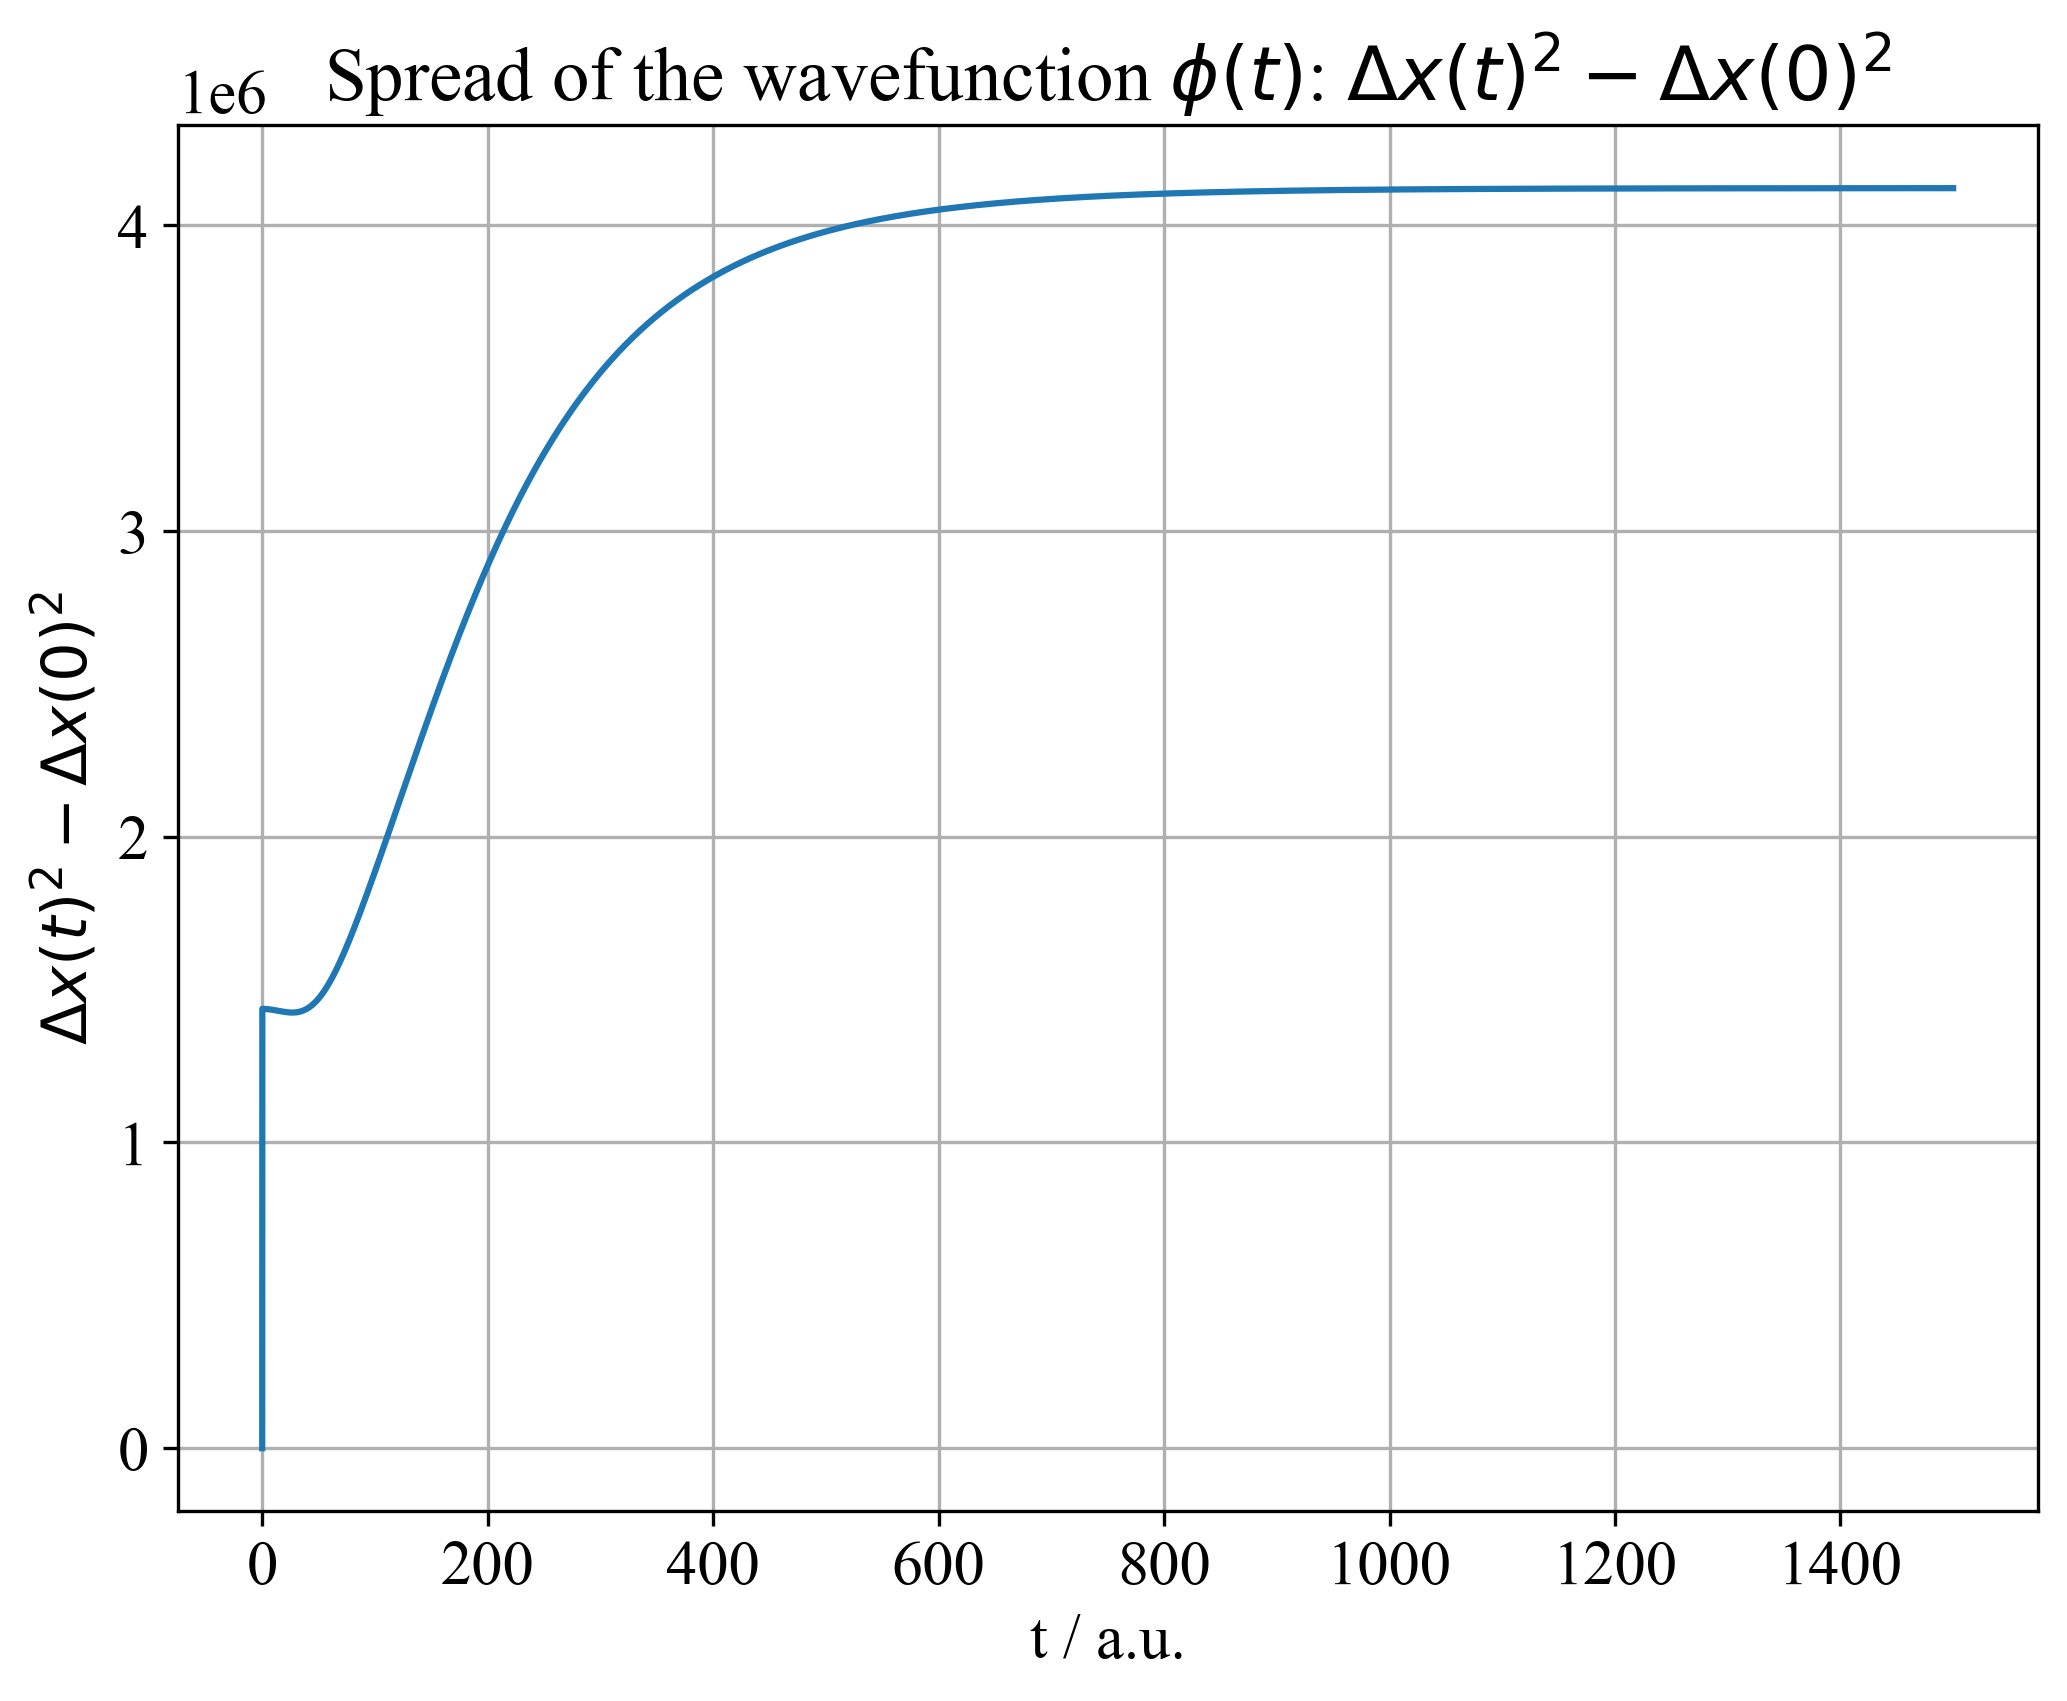

In [221]:
#plot the graph -------------------------------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})



plot(t_series,spread_x_list)

# Add styles for the graph
plt.title(r'Spread of the wavefunction $\phi(t)$: $\Delta x(t)^2-\Delta x(0)^2$')

plt.ylabel(r'$\Delta x(t)^2-\Delta x(0)^2$')
plt.xlabel('t / a.u.')

#plt.xlim([-5,200])
#plt.ylim()


plt.grid(True, which='both')
#plt.axhline(y=0, color='k')
#plt.axvline(x=0, color='k')

#plt.legend()
plt.show()

In [29]:
del_x_0

(0.8614946486583479+0j)

## Question 2: FCF

In [232]:
t_grid=linspace(0,(nsteps+1)*dt,nsteps+1)
shif4=np.e**(1j*(peak_value+E_grd)*t_grid)

integrand4=[]
newwf4=[]
for i in range(len(wf_dynamics_exi[0])):
    integrandd4=shif4*wf_dynamics_exi[:,i]
    integrand4.append(integrandd4)
for i in integrand4:
    newwf4.append(np.trapz(i,t_grid))




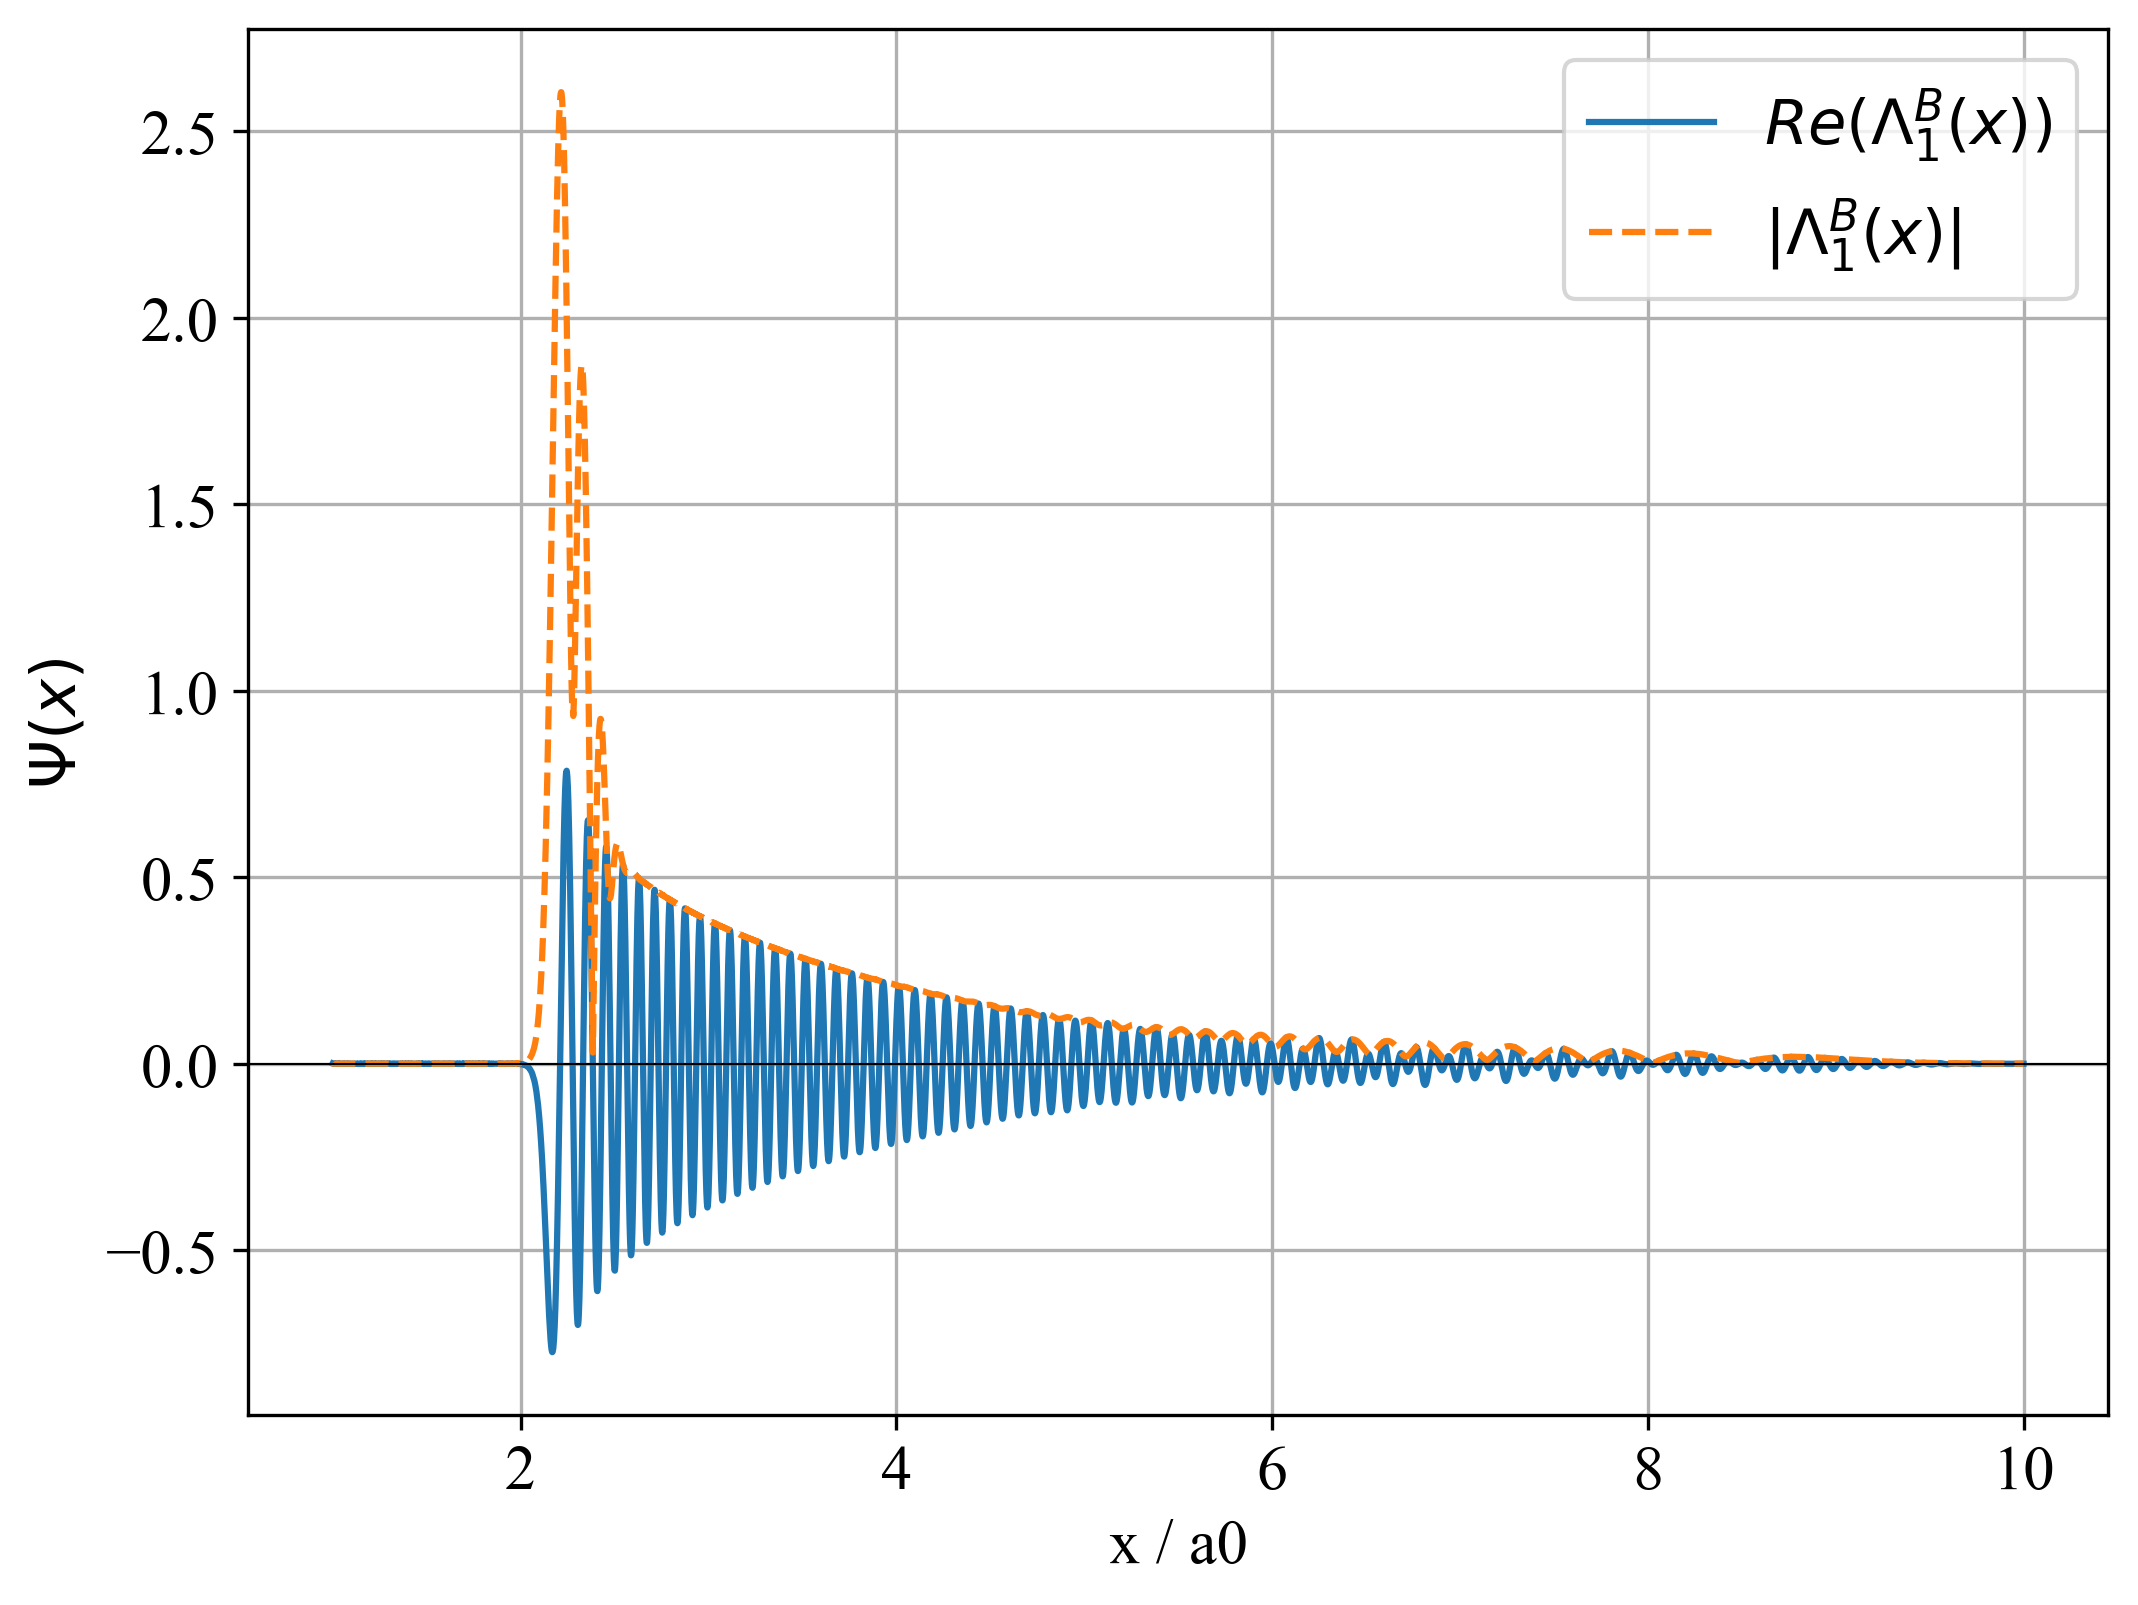

In [231]:
#plot the graph -------------------------------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})



plt.plot(x_grid,-np.real(newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))),label='$Re(\Lambda_1^B(x))$')
plt.plot(x_grid,np.abs(newwf4)/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid)),label='$|\Lambda_1^B(x)|$',linestyle="--")

# Add styles for the graph
#plt.title(r'Spread of the wavefunction $\phi(t)$: $\Delta x(t)^2-\Delta x(0)^2$')

plt.ylabel(r'$\Psi(x)$')
plt.xlabel('x / a0')

#plt.xlim([-5,200])
#plt.ylim()


plt.grid(True, which='both')
plt.axhline(y=0, color='k',linewidth=0.5)
#plt.axvline(x=0, color='k')

plt.legend()
plt.show()

### FC factor

In [263]:
np.linspace(0,20,21)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [255]:
def fk_factor(v):
    # v is the vibrational quantum number of the excited electronic state
    ground_eigen = eigen_ho((x_grid-2.29716),0,m,k_grnd())
    excited_eigen = eigen_ho((x_grid-3.03150),v,m,k_exci())
    integrand=np.conj(ground_eigen) * excited_eigen
    fk = np.trapz(integrand,x_grid)
    return abs(fk)

In [287]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,10))
fk_list=[]
for i in range(23):
    fk_list.append(fk_factor(i)**2)


<Figure size 3000x3000 with 0 Axes>

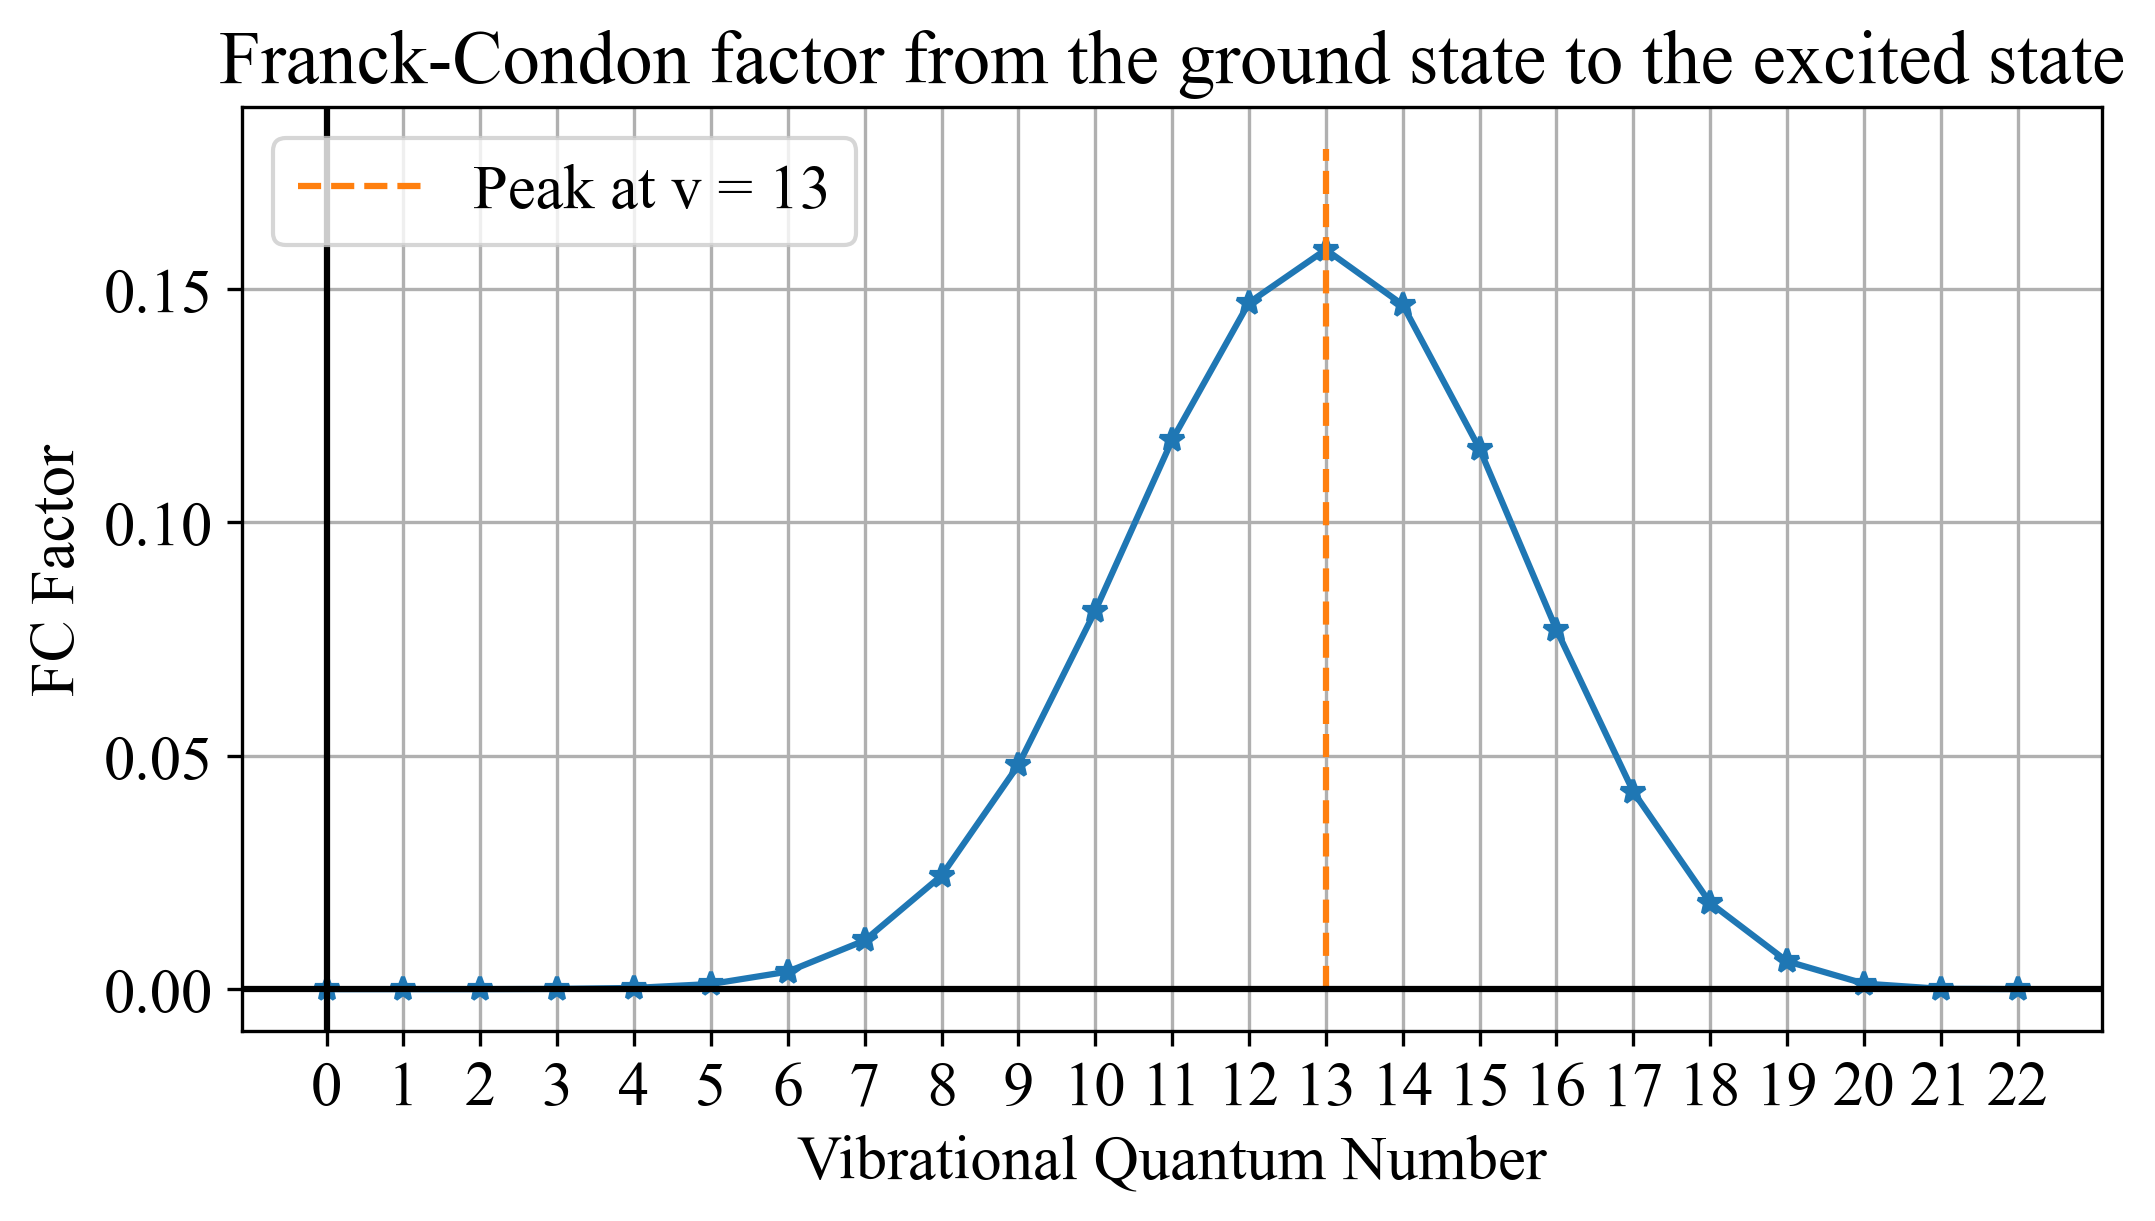

In [295]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 15})


plt.plot(np.linspace(0,22,23),fk_list,marker="*")
plot(array([13,13]), array([0,0.18]),linestyle = '--', label=r'Peak at v = 13')


plt.ylabel("FC Factor")
plt.xlabel("Vibrational Quantum Number")
# Add styles for the graph
plt.title(r'Franck-Condon factor from the ground state to the excited state')


#plt.xlim([-5,200])
#plt.ylim([])

#plt.yticks(np.linspace(0,1,5))
plt.xticks(np.arange(0,23))

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.legend(loc='upper left')
plt.show()

### FCF for Lambda and ground state

In [280]:
get_lambda_wf = newwf4/np.sqrt(np.trapz(abs(np.array(newwf4))**2,x_grid))


# v is the vibrational quantum number of the excited electronic state
ground_eigen = eigen_ho((x_grid-2.29716),0,m,k_grnd())
integrand=np.conj(ground_eigen) * get_lambda_wf
fk = np.trapz(integrand,x_grid)

print('fcf for lambda_wf and ground state function',fk**2)

fcf for lambda_wf and ground state function (0.07283169254249633+0.01623870743602607j)


In [273]:
0.29133746404902566

(0.07283169254249633+0.01623870743602607j)

In [270]:
0.07372586857691549

NameError: name 'fk' is not defined